In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, DenseFeatures, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
##extracting zip file and renaming as 'Economic_data'

##import zipfile
##import os
##files = zipfile.ZipFile('Economic_Index.zip', 'r')
##files.extractall('Economic_data')
##files.close() 

In [3]:
list=os.listdir('Economic_data/Economic Index')
list

['data-resource_2016_10_18_Daily-Total-Rainfall-Till-Jun-2014.csv',
 'data-resource_2016_10_18_Doctor-Directory.xls',
 'data-resource_2016_10_18_National-E-Service-List.xlsx',
 'data-resource_2016_10_18_Rice-Export-Data (1).csv',
 'data-resource_2016_10_18_Rice-Export-Data.csv',
 'data-resource_2016_10_18_Rice-Import-Data (1).csv',
 'data-resource_2016_10_18_Rice-Import-Data.csv',
 'data-resource_2016_10_24_bangladesh-literacy-rate.csv',
 'data-resource_2016_10_24_bangladesh-population-growth-ratio.csv',
 'data-resource_2016_10_24_gdp-growth-rate-in-bangladesh (1).csv',
 'data-resource_2016_10_24_gdp-growth-rate-in-bangladesh.csv',
 'data-resource_2016_10_25_a2i.csv',
 'data-resource_2016_10_26_Place-of-Births (1).csv',
 'data-resource_2016_10_26_Place-of-Births.csv',
 'data-resource_2016_10_26_rice-export-2010-2015 (1).csv',
 'data-resource_2016_10_26_rice-export-2010-2015.csv',
 'data-resource_2016_11_17_Area under cultivation of different crops 2014-15 (1).xlsx',
 'data-resource_201

In [4]:
#separating csv & xlsx file
csv=[]
xlsx=[]

for filename in list:
    if filename.endswith('.csv'):
        csv.append('Economic_data/Economic Index/'+filename)
    if filename.endswith('.xlsx'):
        xlsx.append('Economic_data/Economic Index/'+filename)
    

In [5]:
csv

['Economic_data/Economic Index/data-resource_2016_10_18_Daily-Total-Rainfall-Till-Jun-2014.csv',
 'Economic_data/Economic Index/data-resource_2016_10_18_Rice-Export-Data (1).csv',
 'Economic_data/Economic Index/data-resource_2016_10_18_Rice-Export-Data.csv',
 'Economic_data/Economic Index/data-resource_2016_10_18_Rice-Import-Data (1).csv',
 'Economic_data/Economic Index/data-resource_2016_10_18_Rice-Import-Data.csv',
 'Economic_data/Economic Index/data-resource_2016_10_24_bangladesh-literacy-rate.csv',
 'Economic_data/Economic Index/data-resource_2016_10_24_bangladesh-population-growth-ratio.csv',
 'Economic_data/Economic Index/data-resource_2016_10_24_gdp-growth-rate-in-bangladesh (1).csv',
 'Economic_data/Economic Index/data-resource_2016_10_24_gdp-growth-rate-in-bangladesh.csv',
 'Economic_data/Economic Index/data-resource_2016_10_25_a2i.csv',
 'Economic_data/Economic Index/data-resource_2016_10_26_Place-of-Births (1).csv',
 'Economic_data/Economic Index/data-resource_2016_10_26_Pla

In [6]:
xlsx

['Economic_data/Economic Index/data-resource_2016_10_18_National-E-Service-List.xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_Area under cultivation of different crops 2014-15 (1).xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_Area under cultivation of different crops 2014-15.xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_Consumption at current prices 2012-16.xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_GDP at Current and Constant Market Prices 2012-16.xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_GNI at Current and Constant Market Places 2012-16.xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_Investment as % of GDP 2012-16 (1).xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_Investment as % of GDP 2012-16.xlsx',
 'Economic_data/Economic Index/data-resource_2016_11_17_National Consumer Price Index (CPI) and Inflation Rate (Point to Point) 2013-17.xlsx',
 'Economic_data/Econo

In [7]:
#watching files
i=0
for filename in csv:
    
    df = pd.read_csv(filename) 
    print("------"+str(i)+"------")
    i+=1
    print(str(filename))
    print(df)

------0------
Economic_data/Economic Index/data-resource_2016_10_18_Daily-Total-Rainfall-Till-Jun-2014.csv
      Station  Year  Month    1    2    3    4    5    6    7  ...   22   23  \
0       Bogra  1948      1  ***  ***  ***  ***  ***  ***  ***  ...  ***  ***   
1       Bogra  1948      2    0    0    0    4    1    0    0  ...    0    0   
2       Bogra  1948      3    0    0    0    0    0    0    0  ...    0    0   
3       Bogra  1948      4    0    0    0    0    7    0    0  ...    0    0   
4       Bogra  1948      5    0   24    0    0    0    0    0  ...    9    7   
...       ...   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
20773  Teknaf  2014      2    0    0    0    0    0    0    0  ...    0    0   
20774  Teknaf  2014      3    0    0    0    0    0    0    0  ...    0    0   
20775  Teknaf  2014      4    0    0    0    0    0    0    1  ...    0    0   
20776  Teknaf  2014      5   10    0    1    0    2    0    0  ...    0    0   
20777  Teknaf

        Sector  2012-13  2013-14  2014-15  2015-16(p*)
0  Agriculture     2.46     4.37     3.33          2.6
1     Industry     9.64     8.16     9.67         10.1
2     Services     5.51     5.62     5.80          6.7
------46------
Economic_data/Economic Index/data-resource_2016_11_20_Sectoral Growth Rate of GDP at Current Prices (Agriculture) 2012-16 (1).csv
  Industrial origin sector                Unnamed: 1  \
0              Agriculture                       NaN   
1                        1  AGRICULTURE AND FORESTRY   
2                      NaN                        a)   
3                      NaN                        b)   
4                      NaN                        c)   
5                        2                   FISHING   

                    Unnamed: 2  2012-13  2013-14  2014-15  2015-16  
0                          NaN     8.81    11.05     8.63     8.62  
1                          NaN     7.11    10.22     7.64     7.83  
2         Crops & horticulture     

In [8]:
#watching files
i=0
xl=xlsx[:34]
for filename in xl:
    
    df = pd.read_excel(filename) 
    print("------"+str(i)+"------")
    i+=1
    print(str(filename))
    print(df)



------0------
Economic_data/Economic Index/data-resource_2016_10_18_National-E-Service-List.xlsx
                               National E-Service List  \
0                                         Service Name   
1    e-Application in Ministry of Public Administra...   
2                                  EMS Parcel Tracking   
3                             Railway Ticketing System   
4                         DESCO Internet Bills Payment   
..                                                 ...   
199       Shahjalal University of Science & Technology   
200              Sher-e-Bangla Agricultural University   
201                     Sylhet Agricultural University   
202                              Chittagong Univarsity   
203                             University of Rajshahi   

                                     Unnamed: 1                 Unnamed: 2  \
0                                   Service URL           Service Category   
1        http://apps.mopa.gov.bd/mopaauth/login   

------16------
Economic_data/Economic Index/data-resource_2016_11_17_Sectoral Growth Rate of GDP at Current Prices (Agriculture) 2012-16.xlsx
   Unnamed: 0                                         Unnamed: 1  \
0         NaN  Sectoral Growth Rate of GDP at Current Prices ...   
1         NaN                           Industrial origin sector   
2         NaN                                        Agriculture   
3         NaN                                                  1   
4         NaN                                                NaN   
5         NaN                                                NaN   
6         NaN                                                NaN   
7         NaN                                                  2   
8         NaN                                                NaN   
9         NaN                                                NaN   

                 Unnamed: 2                   Unnamed: 3 Unnamed: 4  \
0                       NaN           

------32------
Economic_data/Economic Index/data-resource_2016_11_20_Provisional and final estitmate of GDP Transport.xlsx
   Unnamed: 0                                         Unnamed: 1  \
0         NaN                                                NaN   
1         NaN                                                NaN   
2         NaN   Provisional and Final Estimates of GDP Transp...   

             Unnamed: 2      Unnamed: 3            Unnamed: 4      Unnamed: 5  
0     Gross Value Added             NaN           Growth Rate             NaN  
1  Provisional Estimate  Final Estimate  Provisional Estimate  Final Estimate  
2               1435236         1500253                  6.85            11.7  
------33------
Economic_data/Economic Index/data-resource_2016_11_20_Road Accident and casualties Statistics (2009-2016).xlsx
                                          Unnamed: 0           Unnamed: 1  \
0  Road Accident and casualties Statistics (2009-...                  NaN   
1   

In [9]:
print(str(xlsx[34]))

Economic_data/Economic Index/data-resource_2017_01_23_School-and-College.xlsx


In [10]:
#deleting common files

csv_remove_index=[2,4,8,11,13,16,23,24,28,38,42,45,47]
xlsx_remove_index=[2,5,7,11,14,16,18,19,20]

In [11]:

csv_r_names=[]
for i in csv_remove_index:
    csv_r_names.append(csv[i])
    
xlsx_r_names=[]
for i in xlsx_remove_index:
    xlsx_r_names.append(xl[i])
    
#removing
for i in csv_r_names:
    csv.remove(i)
for i in xlsx_r_names:
    xl.remove(i)

In [12]:
#first dataframe

l_use=[12,16,17,18,19,27,28,32,33,36,37]
csv_use=[]
for i in l_use:
    csv_use.append(csv[i])

In [13]:
df=pd.read_csv(csv_use[6])
df

Major Crops  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16 
0              Aus    21.33    23.32    21.58    23.26    23.28     22.89
1             Aman   127.91   127.98   128.97   130.23   131.90    131.90
2             Boro   186.17   187.59   187.78   190.07   191.92    191.92
3            Wheat     9.72     9.95    12.55    13.03    13.48     13.48
4    Total cereals   345.13   348.85   350.88   356.59   360.58    360.19
5            Maize    10.18    12.98    15.48    21.24    23.50     23.50
6           Potato    83.26    82.05    86.03    89.50    92.54     92.54
7  Jute (Lac bale)    83.96    80.03    76.11    74.36    75.01     75.58

In [14]:
df=df.drop(['2010-11','2011-12'], axis = 1)
df

Major Crops  2012-13  2013-14  2014-15  2015-16 
0              Aus    21.58    23.26    23.28     22.89
1             Aman   128.97   130.23   131.90    131.90
2             Boro   187.78   190.07   191.92    191.92
3            Wheat    12.55    13.03    13.48     13.48
4    Total cereals   350.88   356.59   360.58    360.19
5            Maize    15.48    21.24    23.50     23.50
6           Potato    86.03    89.50    92.54     92.54
7  Jute (Lac bale)    76.11    74.36    75.01     75.58

In [15]:
df=pd.read_csv(csv_use[9])
df

Year As % of total investment Unnamed: 2      Unnamed: 3 Unnamed: 4
0           NaN           2005-06 prices        NaN  Current prices        NaN
1           NaN                  Private     Public         Private     Public
2       2007-08                    82.84      17.16           82.83      17.17
3       2008-09                    83.59      16.41           83.53      16.47
4       2009-10                    82.36      17.64           82.19      17.81
5       2010-11                    81.15      18.85           80.83      19.17
6       2011-12                    80.37      19.63           79.61      20.39
7       2012-13                     77.6       22.4           76.61      23.39
8       2013-14                    77.24      22.76           77.09      22.91
9       2014-15                    76.44      23.56           76.39      23.61
10  2015-16(p*)                    74.07      25.93           74.14      25.86

In [16]:
df=df.set_index('Year')
df

As % of total investment Unnamed: 2      Unnamed: 3 Unnamed: 4
Year                                                                      
NaN                   2005-06 prices        NaN  Current prices        NaN
NaN                          Private     Public         Private     Public
2007-08                        82.84      17.16           82.83      17.17
2008-09                        83.59      16.41           83.53      16.47
2009-10                        82.36      17.64           82.19      17.81
2010-11                        81.15      18.85           80.83      19.17
2011-12                        80.37      19.63           79.61      20.39
2012-13                         77.6       22.4           76.61      23.39
2013-14                        77.24      22.76           77.09      22.91
2014-15                        76.44      23.56           76.39      23.61
2015-16(p*)                    74.07      25.93           74.14      25.86

In [17]:
df=df.transpose()
df

Year                                 NaN      NaN 2007-08 2008-09 2009-10  \
As % of total investment  2005-06 prices  Private   82.84   83.59   82.36   
Unnamed: 2                           NaN   Public   17.16   16.41   17.64   
Unnamed: 3                Current prices  Private   82.83   83.53   82.19   
Unnamed: 4                           NaN   Public   17.17   16.47   17.81   

Year                     2010-11 2011-12 2012-13 2013-14 2014-15 2015-16(p*)  
As % of total investment   81.15   80.37    77.6   77.24   76.44       74.07  
Unnamed: 2                 18.85   19.63    22.4   22.76   23.56       25.93  
Unnamed: 3                 80.83   79.61   76.61   77.09   76.39       74.14  
Unnamed: 4                 19.17   20.39   23.39   22.91   23.61       25.86

In [18]:
Indicator=['2005-06 prices Private % of total investment','2005-06 prices Public % of total investment','Current prices Private % of total investment','Current prices Public % of total investment']

In [19]:
year_12_13= df["2012-13"].tolist()
year_13_14= df["2013-14"].tolist()
year_14_15= df["2014-15"].tolist()
year_15_16= df["2015-16(p*)"].tolist()

In [20]:
print(str(csv_use[8]))
df=pd.read_csv(csv_use[8])
df

Economic_data/Economic Index/data-resource_2016_11_20_Sectoral Growth rate of GDP at constant Prices 2012-16 (1).csv


Sector  2012-13  2013-14  2014-15  2015-16(p*)
0  Agriculture     2.46     4.37     3.33          2.6
1     Industry     9.64     8.16     9.67         10.1
2     Services     5.51     5.62     5.80          6.7

In [21]:
Indicator+=['Agriculture Growth Rate','Industry Growth Rate','Services Growth Rate']

In [22]:
year_12_13+= df["2012-13"].tolist()
year_13_14+= df["2013-14"].tolist()
year_14_15+= df["2014-15"].tolist()
year_15_16+= df["2015-16(p*)"].tolist()

In [23]:
##renaming columns

for i in range(len(l_use)):
    if i==9  or i==8:
        continue
    else:
        df=pd.read_csv(csv_use[i])
        if 'Indicators' in df.columns:
            df=df.rename(columns = {'Indicators': 'Indicator'})
        if 'Sector' in df.columns:
            df=df.rename(columns = {'Sector': 'Indicator'})
        if 'Major Crops' in df.columns:
            df=df.rename(columns = {'Major Crops': 'Indicator'})
        if '2015-16 ' or '2015-16(p)'  in df.columns:
            df=df.rename(columns = {'2015-16 ':'2015-16(p*)'})
        if '2015-16(p)'  in df.columns:
            df=df.rename(columns = {'2015-16(p)':'2015-16(p*)'})
        
            
        
        Indicator+=df['Indicator'].to_list()
        year_12_13+= df["2012-13"].tolist()
        year_13_14+= df["2013-14"].tolist()
        year_14_15+= df["2014-15"].tolist()
        year_15_16+= df["2015-16(p*)"].tolist()
        
        
        

In [24]:
year_15_16[len(year_15_16)-1]=27139

In [25]:
for i in range(len(year_12_13)):
    year_12_13[i]=float(year_12_13[i])
    year_13_14[i]=float(year_13_14[i])
    year_14_15[i]=float(year_14_15[i])
    year_15_16[i]=float(year_15_16[i])
    
    

In [26]:
data = {'Indicator':Indicator,
        '2012-13':year_12_13,
        '2013-14':year_13_14,
        '2014-15':year_14_15,
        '2015-16':year_15_16,
       }

In [27]:
my_df = pd.DataFrame(data)

my_df=my_df.set_index('Indicator')

In [28]:
my_df_1=my_df.transpose()
my_df_1

Indicator  2005-06 prices Private % of total investment  \
2012-13                                           77.60   
2013-14                                           77.24   
2014-15                                           76.44   
2015-16                                           74.07   

Indicator  2005-06 prices Public % of total investment  \
2012-13                                          22.40   
2013-14                                          22.76   
2014-15                                          23.56   
2015-16                                          25.93   

Indicator  Current prices Private % of total investment  \
2012-13                                           76.61   
2013-14                                           77.09   
2014-15                                           76.39   
2015-16                                           74.14   

Indicator  Current prices Public % of total investment  \
2012-13                                          23.39   
2013-14                                          22.91   
2014-15                                          23.61   
2015-16                                          25.86   

Indicator  Agriculture Growth Rate  Industry Growth Rate  \
2012-13                       2.46                  9.64   
2013-14                       4.37                  8.16   
2014-15                       3.33                  9.67   
2015-16                       2.60                 10.10   

Indicator  Services Growth Rate  Consumption at current prices (billion Tk.)  \
2012-13                    5.51                                       9347.0   
2013-14                    5.62                                      10469.0   
2014-15                    5.80                                      11799.0   
2015-16                    6.70                                      13163.0   

Indicator  Private consumption (billion Tk.)  \
2012-13                               8734.0   
2013-14                               9751.0   
2014-15                              10980.0   
2015-16                              12144.0   

Indicator  Public consumption (billion Tk.)  ...    Aman    Boro  Wheat  \
2012-13                               613.0  ...  128.97  187.78  12.55   
2013-14                               717.0  ...  130.23  190.07  13.03   
2014-15                               819.0  ...  131.90  191.92  13.48   
2015-16                              1019.0  ...  131.90  191.92  13.48   

Indicator  Total cereals  Maize  Potato  Jute (Lac bale)  \
2012-13           350.88  15.48   86.03            76.11   
2013-14           356.59  21.24   89.50            74.36   
2014-15           360.58  23.50   92.54            75.01   
2015-16           360.19  23.50   92.54            75.58   

Indicator  Domestic savings at current prices (billion Tk.)  \
2012-13                                              2642.0   
2013-14                                              2968.0   
2014-15                                              3359.0   
2015-16                                              4132.0   

Indicator  National savings at current prices (billion Tk.)  \
2012-13                                              3660.0   
2013-14                                              3927.0   
2014-15                                              4399.0   
2015-16                                              5242.0   

Indicator  Foreign exchange reserve (million US$)  
2012-13                                   15315.0  
2013-14                                   21508.0  
2014-15                                   25025.0  
2015-16                                   27139.0  

[4 rows x 34 columns]

In [29]:
##creating second dataframe

l_use=[3,4,5]
csv_use=[]
for i in l_use:
    csv_use.append(csv[i])

In [30]:
print(str(csv_use[0]))
df=pd.read_csv(csv_use[0])
df

Economic_data/Economic Index/data-resource_2016_10_24_bangladesh-literacy-rate.csv


Year  Ratio
0  1981  29.23
1  1991  35.32
2  2001  47.49
3  2013  59.72

In [31]:
Year=df['Year'].to_list()
l_rate=df['Ratio'].to_list()

In [32]:
print(str(csv_use[2]))
df=pd.read_csv(csv_use[2])
df

Economic_data/Economic Index/data-resource_2016_10_24_gdp-growth-rate-in-bangladesh (1).csv


Year  GDP Growth Rate
0   1980              0.8
1   1981              3.8
2   1982              2.4
3   1983              4.0
4   1984              5.2
5   1985              3.2
6   1986              4.2
7   1987              3.7
8   1988              2.2
9   1989              2.6
10  1990              5.9
11  1991              3.3
12  1992              5.0
13  1993              4.6
14  1994              4.1
15  1995              4.9
16  1996              4.6
17  1997              5.4
18  1998              5.2
19  1999              4.9
20  2000              5.9
21  2001              5.3
22  2002              4.4
23  2003              5.3
24  2004              6.3
25  2005              6.0
26  2006              6.6
27  2007              7.1
28  2008              6.0
29  2009              5.0
30  2010              5.6
31  2011              6.5
32  2012              6.5
33  2013              6.0
34  2014              6.0
35  2015              6.5

In [33]:
df=df.loc[df['Year'].isin([1981,1991,2001,2013])]
df

Year  GDP Growth Rate
1   1981              3.8
11  1991              3.3
21  2001              5.3
33  2013              6.0

In [34]:
gdp_rate=df['GDP Growth Rate'].to_list()

In [35]:
print(str(csv_use[1]))
df=pd.read_csv(csv_use[1])
df

Economic_data/Economic Index/data-resource_2016_10_24_bangladesh-population-growth-ratio.csv


Year  Population      Male    Female
0   1971    65733076  34058589  31674487
1   1972    66997968  34713973  32283995
2   1973    68118479  35294549  32823930
3   1974    69248216  35879905  33368311
4   1975    70542557  36550548  33992009
5   1976    72088680  37351648  34737032
6   1977    73889336  38284630  35604706
7   1978    75898422  39325607  36572815
8   1979    78045163  40437908  37607255
9   1980    80253062  41581897  38671165
10  1981    82481879  42736725  39745154
11  1982    84733905  43903578  40830327
12  1983    87024720  45090528  41934192
13  1984    89370376  46305894  43064482
14  1985    91787361  47558218  44229143
15  1986    94282990  48851290  45431700
16  1987    96850030  50181363  46668667
17  1988    99464407  51535962  47928445
18  1989   102090061  52896405  49193656
19  1990   104691854  54244484  50447370
20  1991   107246408  55568087  51678321
21  1992   109748569  56864544  52884025
22  1993   112214907  58142439  54072468
23  1994   114678032  59418669  55259363
24  1995   117170739  60710227  56460512
25  1996   119707446  62024583  57682863
26  1997   122280616  63357832  58922784
27  1998   124871845  64700438  60171407
28  1999   127457928  66040377  61417551
29  2000   130013506  67364511  62648995
30  2001   132528402  68667566  63860836
31  2002   135002260  69949358  65052902
32  2003   137414315  71199127  66215188
33  2004   139721980  72394808  67327172
34  2005   141886883  73516520  68370363
35  2006   143884609  74551611  69332998
36  2007   145715963  75500499  70215464
37  2008   147422580  76384756  71037824
38  2009   149079155  77243085  71836070
39  2010   150761307  78114667  72646640
40  2011   152511195  79021345  73489850
41  2012   154331500  79964508  74366992
42  2013   156207391  80936472  75270919
43  2014   158117454  81926142  76191312
44  2015   160036578  82920507  77116071
45  2016   161957017  83915553  78041464

In [36]:
df=df.loc[df['Year'].isin([1980,1981,1990,1991,2000,2001,2012,2013])]
df

Year  Population      Male    Female
9   1980    80253062  41581897  38671165
10  1981    82481879  42736725  39745154
19  1990   104691854  54244484  50447370
20  1991   107246408  55568087  51678321
29  2000   130013506  67364511  62648995
30  2001   132528402  68667566  63860836
41  2012   154331500  79964508  74366992
42  2013   156207391  80936472  75270919

In [37]:
df_1=df.loc[df['Year'].isin([1980,1990,2000,2012])]
df_2=df.loc[df['Year'].isin([1981,1991,2001,2013])]


In [38]:
Year=df_2['Year'].to_list()
p_1=df_1['Population'].to_list()
p_2=df_2['Population'].to_list()
m_1=df_1['Male'].to_list()
m_2=df_2['Male'].to_list()
f_1=df_1['Female'].to_list()
f_2=df_2['Female'].to_list()

In [39]:
p_g=[]
m_g=[]
f_g=[]

for (i,j) in zip(p_1,p_2):
    p_g.append(j-i)
for (i,j) in zip(m_1,m_2):
    m_g.append(j-i)
for (i,j) in zip(f_1,f_2):
    f_g.append(j-i)
    
    

In [40]:
data = {'Year':Year,
        'Literacy Rate':l_rate,
        'GDP Growth Rate':gdp_rate,
        'Population Growth':p_g,
        'Male Growth':m_g,
        'Female Growth':f_g
       }

In [41]:
my_df_2=pd.DataFrame(data)

my_df_2=my_df_2.set_index('Year')
my_df_2

Literacy Rate  GDP Growth Rate  Population Growth  Male Growth  \
Year                                                                   
1981          29.23              3.8            2228817      1154828   
1991          35.32              3.3            2554554      1323603   
2001          47.49              5.3            2514896      1303055   
2013          59.72              6.0            1875891       971964   

      Female Growth  
Year                 
1981        1073989  
1991        1230951  
2001        1211841  
2013         903927

In [42]:
##creating 3rd dataframe

l_use=[0,1,2,4]
csv_use=[]
for i in l_use:
    csv_use.append(csv[i])

In [43]:
print(str(csv_use[0]))
df=pd.read_csv(csv_use[0])
df

Economic_data/Economic Index/data-resource_2016_10_18_Daily-Total-Rainfall-Till-Jun-2014.csv


Station  Year  Month    1    2    3    4    5    6    7  ...   22   23  \
0       Bogra  1948      1  ***  ***  ***  ***  ***  ***  ***  ...  ***  ***   
1       Bogra  1948      2    0    0    0    4    1    0    0  ...    0    0   
2       Bogra  1948      3    0    0    0    0    0    0    0  ...    0    0   
3       Bogra  1948      4    0    0    0    0    7    0    0  ...    0    0   
4       Bogra  1948      5    0   24    0    0    0    0    0  ...    9    7   
...       ...   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
20773  Teknaf  2014      2    0    0    0    0    0    0    0  ...    0    0   
20774  Teknaf  2014      3    0    0    0    0    0    0    0  ...    0    0   
20775  Teknaf  2014      4    0    0    0    0    0    0    1  ...    0    0   
20776  Teknaf  2014      5   10    0    1    0    2    0    0  ...    0    0   
20777  Teknaf  2014      6    0    0    1    0    6    3    9  ...   60  165   

        24   25   26   27   28   29   30   31  
0      ***  ***  ***  ***  ***  ***  ***  ***  
1        0    0    0    0    0    0  NaN  NaN  
2        0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0   18  NaN  
4       24   31   14    0    1    8    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  
20773    0    0    0    0    0  NaN  NaN  NaN  
20774    0    0    0    0    0    0    0    0  
20775    0    0    0    0    0    0    0  NaN  
20776    0    1    0    0    1   16    0    0  
20777   28   58   60    5    3   53  146  NaN  

[20778 rows x 34 columns]

In [44]:
month=df['Month'].to_list()
month=np.array(month)
np.unique(month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [45]:
df.loc[df['Year'].isin([2014])]

Station  Year  Month   1   2  3  4  5  6  7  ...  22   23  24  25  \
20568  Ambagan(Ctg)  2014      1   0   0  0  0  0  0  0  ...   0    0   0   0   
20569  Ambagan(Ctg)  2014      2   0   0  0  0  0  0  0  ...   0    0   0   0   
20570  Ambagan(Ctg)  2014      3   0   0  0  0  0  0  0  ...   0    7   1  21   
20571  Ambagan(Ctg)  2014      4   0   0  0  0  6  0  0  ...   0    0   0   0   
20572  Ambagan(Ctg)  2014      5   0  35  7  4  7  1  0  ...   0    0   0  11   
...             ...   ...    ...  ..  .. .. .. .. .. ..  ...  ..  ...  ..  ..   
20773        Teknaf  2014      2   0   0  0  0  0  0  0  ...   0    0   0   0   
20774        Teknaf  2014      3   0   0  0  0  0  0  0  ...   0    0   0   0   
20775        Teknaf  2014      4   0   0  0  0  0  0  1  ...   0    0   0   0   
20776        Teknaf  2014      5  10   0  1  0  2  0  0  ...   0    0   0   1   
20777        Teknaf  2014      6   0   0  1  0  6  3  9  ...  60  165  28  58   

       26 27 28   29   30   31  
20568   0  0  0    0    0    0  
20569   0  0  0  NaN  NaN  NaN  
20570   0  0  0    0    0    0  
20571   0  0  1    0   23  NaN  
20572   2  0  8   32    5    0  
...    .. .. ..  ...  ...  ...  
20773   0  0  0  NaN  NaN  NaN  
20774   0  0  0    0    0    0  
20775   0  0  0    0    0  NaN  
20776   0  0  1   16    0    0  
20777  60  5  3   53  146  NaN  

[210 rows x 34 columns]

In [46]:
df.drop(df.index[(df["Year"] == 2014)],axis=0,inplace=True)

df

Station  Year  Month    1    2    3    4    5    6    7  ...   22   23  \
0       Bogra  1948      1  ***  ***  ***  ***  ***  ***  ***  ...  ***  ***   
1       Bogra  1948      2    0    0    0    4    1    0    0  ...    0    0   
2       Bogra  1948      3    0    0    0    0    0    0    0  ...    0    0   
3       Bogra  1948      4    0    0    0    0    7    0    0  ...    0    0   
4       Bogra  1948      5    0   24    0    0    0    0    0  ...    9    7   
...       ...   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
20563  Teknaf  2013      8   48   31    0    0    1   11    8  ...   15   22   
20564  Teknaf  2013      9   11    2    8   30   17   15    8  ...    0    7   
20565  Teknaf  2013     10    0    0   15   42   25    5    1  ...   12    2   
20566  Teknaf  2013     11    0    0    0    0    0    0    0  ...    0    0   
20567  Teknaf  2013     12    0    0    0    0    0    0    0  ...    0    0   

        24   25   26   27   28   29   30   31  
0      ***  ***  ***  ***  ***  ***  ***  ***  
1        0    0    0    0    0    0  NaN  NaN  
2        0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0   18  NaN  
4       24   31   14    0    1    8    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  
20563    0   10    9   53   73   13    2   36  
20564    1   42    6   44    7   30    7  NaN  
20565    0    5    1   76   23    6    0    0  
20566    0    0    0    0    0    0    0  NaN  
20567    0    0    0    0    0    0    0    0  

[20568 rows x 34 columns]

In [47]:
df=df.fillna(0)
df

Station  Year  Month    1    2    3    4    5    6    7  ...   22   23  \
0       Bogra  1948      1  ***  ***  ***  ***  ***  ***  ***  ...  ***  ***   
1       Bogra  1948      2    0    0    0    4    1    0    0  ...    0    0   
2       Bogra  1948      3    0    0    0    0    0    0    0  ...    0    0   
3       Bogra  1948      4    0    0    0    0    7    0    0  ...    0    0   
4       Bogra  1948      5    0   24    0    0    0    0    0  ...    9    7   
...       ...   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
20563  Teknaf  2013      8   48   31    0    0    1   11    8  ...   15   22   
20564  Teknaf  2013      9   11    2    8   30   17   15    8  ...    0    7   
20565  Teknaf  2013     10    0    0   15   42   25    5    1  ...   12    2   
20566  Teknaf  2013     11    0    0    0    0    0    0    0  ...    0    0   
20567  Teknaf  2013     12    0    0    0    0    0    0    0  ...    0    0   

        24   25   26   27   28   29   30   31  
0      ***  ***  ***  ***  ***  ***  ***  ***  
1        0    0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0   18    0  
4       24   31   14    0    1    8    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  
20563    0   10    9   53   73   13    2   36  
20564    1   42    6   44    7   30    7    0  
20565    0    5    1   76   23    6    0    0  
20566    0    0    0    0    0    0    0    0  
20567    0    0    0    0    0    0    0    0  

[20568 rows x 34 columns]

In [48]:
df=df.drop(['Station','Month'], axis = 1)
df

Year    1    2    3    4    5    6    7      8   9  ...   22   23   24  \
0      1948  ***  ***  ***  ***  ***  ***  ***  *** *  **  ...  ***  ***  ***   
1      1948    0    0    0    4    1    0    0      0   0  ...    0    0    0   
2      1948    0    0    0    0    0    0    0      0   0  ...    0    0    0   
3      1948    0    0    0    0    7    0    0      0   0  ...    0    0    0   
4      1948    0   24    0    0    0    0    0      0   2  ...    9    7   24   
...     ...  ...  ...  ...  ...  ...  ...  ...    ...  ..  ...  ...  ...  ...   
20563  2013   48   31    0    0    1   11    8      3   0  ...   15   22    0   
20564  2013   11    2    8   30   17   15    8      1   0  ...    0    7    1   
20565  2013    0    0   15   42   25    5    1      0   0  ...   12    2    0   
20566  2013    0    0    0    0    0    0    0      0   0  ...    0    0    0   
20567  2013    0    0    0    0    0    0    0      0   0  ...    0    0    0   

        25   26   27   28   29   30   31  
0      ***  ***  ***  ***  ***  ***  ***  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0   18    0  
4       31   14    0    1    8    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
20563   10    9   53   73   13    2   36  
20564   42    6   44    7   30    7    0  
20565    5    1   76   23    6    0    0  
20566    0    0    0    0    0    0    0  
20567    0    0    0    0    0    0    0  

[20568 rows x 32 columns]

In [49]:
##taking year from 2000-2013
list_1=[]

j=2000
for i in range(2013-2000+1):
    list_1.append(i+j)
    
    


df=df.loc[df['Year'].isin(list_1)]
df

Year   1   2   3   4   5   6  7  8   9  ...  22  23  24  25  26  27  \
14748  2000   0   0   0   0   0   0  0  0   0  ...  17   0  10   0   0   0   
14749  2000   0   0   0   0   0   9  1  0   0  ...   0   0   0   0   0   0   
14750  2000   0   0   0   0   0   0  0  0  12  ...   0   0   0   0   0   0   
14751  2000   0   0   0   0   0   0  0  0   0  ...  20   0   2  22   6  25   
14752  2000   0  23  11   0   0   0  2  4   0  ...   9   0  13  99  44  18   
...     ...  ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..   
20563  2013  48  31   0   0   1  11  8  3   0  ...  15  22   0  10   9  53   
20564  2013  11   2   8  30  17  15  8  1   0  ...   0   7   1  42   6  44   
20565  2013   0   0  15  42  25   5  1  0   0  ...  12   2   0   5   1  76   
20566  2013   0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
20567  2013   0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   

       28  29  30  31  
14748   0   0   7   0  
14749   0   0   0   0  
14750   0   0   0   0  
14751   1   0  19   0  
14752  87  24   9   0  
...    ..  ..  ..  ..  
20563  73  13   2  36  
20564   7  30   7   0  
20565  23   6   0   0  
20566   0   0   0   0  
20567   0   0   0   0  

[5820 rows x 32 columns]

In [50]:
df=df.set_index('Year')
df

1   2   3   4   5   6  7  8   9  10  ...  22  23  24  25  26  27  28  \
Year                                        ...                               
2000   0   0   0   0   0   0  0  0   0   0  ...  17   0  10   0   0   0   0   
2000   0   0   0   0   0   9  1  0   0   0  ...   0   0   0   0   0   0   0   
2000   0   0   0   0   0   0  0  0  12   0  ...   0   0   0   0   0   0   0   
2000   0   0   0   0   0   0  0  0   0   0  ...  20   0   2  22   6  25   1   
2000   0  23  11   0   0   0  2  4   0   0  ...   9   0  13  99  44  18  87   
...   ..  ..  ..  ..  ..  .. .. ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
2013  48  31   0   0   1  11  8  3   0  16  ...  15  22   0  10   9  53  73   
2013  11   2   8  30  17  15  8  1   0   2  ...   0   7   1  42   6  44   7   
2013   0   0  15  42  25   5  1  0   0   0  ...  12   2   0   5   1  76  23   
2013   0   0   0   0   0   0  0  0   0   0  ...   0   0   0   0   0   0   0   
2013   0   0   0   0   0   0  0  0   0   0  ...   0   0   0   0   0   0   0   

      29  30  31  
Year              
2000   0   7   0  
2000   0   0   0  
2000   0   0   0  
2000   0  19   0  
2000  24   9   0  
...   ..  ..  ..  
2013  13   2  36  
2013  30   7   0  
2013   6   0   0  
2013   0   0   0  
2013   0   0   0  

[5820 rows x 31 columns]

In [51]:
##removing string values

for i in range(31):
    if i==7:
        list=[0.0]*(len(df[str(i+1)].tolist()))
    else:
        
        list=df[str(i+1)].tolist()
        for j in range(0, len(list)):
            if list[j]=="***" or list[j]=="**" :
                list[j]=0
            else:
                list[j]=float(list[j])
    df[str(i+1)]=list
        
        

In [52]:
df['Rainfall']=df.mean(axis=1)
df

1     2     3     4     5     6    7    8     9    10  ...    23  \
Year                                                            ...         
2000   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  ...   0.0   
2000   0.0   0.0   0.0   0.0   0.0   9.0  1.0  0.0   0.0   0.0  ...   0.0   
2000   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  12.0   0.0  ...   0.0   
2000   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  ...   0.0   
2000   0.0  23.0  11.0   0.0   0.0   0.0  2.0  0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...  ...  ...   ...   ...  ...   ...   
2013  48.0  31.0   0.0   0.0   1.0  11.0  8.0  0.0   0.0  16.0  ...  22.0   
2013  11.0   2.0   8.0  30.0  17.0  15.0  8.0  0.0   0.0   2.0  ...   7.0   
2013   0.0   0.0  15.0  42.0  25.0   5.0  1.0  0.0   0.0   0.0  ...   2.0   
2013   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  ...   0.0   
2013   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  ...   0.0   

        24    25    26    27    28    29    30    31   Rainfall  
Year                                                             
2000  10.0   0.0   0.0   0.0   0.0   0.0   7.0   0.0   1.096774  
2000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.322581  
2000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.483871  
2000   2.0  22.0   6.0  25.0   1.0   0.0  19.0   0.0   3.838710  
2000  13.0  99.0  44.0  18.0  87.0  24.0   9.0   0.0  14.838710  
...    ...   ...   ...   ...   ...   ...   ...   ...        ...  
2013   0.0  10.0   9.0  53.0  73.0  13.0   2.0  36.0  27.354839  
2013   1.0  42.0   6.0  44.0   7.0  30.0   7.0   0.0  10.580645  
2013   0.0   5.0   1.0  76.0  23.0   6.0   0.0   0.0   8.741935  
2013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
2013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  

[5820 rows x 32 columns]

In [53]:
#removing unnecessary columns
list=[]
for i in range(1,32):
    list.append(str(i))
    
df=df.drop(list, axis = 1)
df


Rainfall
Year           
2000   1.096774
2000   0.322581
2000   1.483871
2000   3.838710
2000  14.838710
...         ...
2013  27.354839
2013  10.580645
2013   8.741935
2013   0.000000
2013   0.000000

[5820 rows x 1 columns]

In [54]:

df_1=df
df_1=df_1.reset_index()
df_1

Year   Rainfall
0     2000   1.096774
1     2000   0.322581
2     2000   1.483871
3     2000   3.838710
4     2000  14.838710
...    ...        ...
5815  2013  27.354839
5816  2013  10.580645
5817  2013   8.741935
5818  2013   0.000000
5819  2013   0.000000

[5820 rows x 2 columns]

In [55]:
##frequency count of year
list=df_1['Year'].tolist()
cnt=[]
for i in range(2000,2014):
    cnt.append(list.count(i))
cnt
    

#[1, 2, 3, 4, 1, 4, 1].count(1)

[420, 420, 420, 408, 408, 408, 408, 408, 420, 420, 420, 420, 420, 420]

In [56]:

list=df_1['Rainfall'].tolist()
list

[1.096774193548387,
 0.3225806451612903,
 1.4838709677419355,
 3.838709677419355,
 14.838709677419354,
 20.06451612903226,
 22.806451612903224,
 18.193548387096776,
 5.32258064516129,
 15.741935483870968,
 0.4838709677419355,
 0.0,
 0.6129032258064516,
 0.5161290322580645,
 1.6129032258064515,
 4.354838709677419,
 7.935483870967742,
 8.96774193548387,
 12.483870967741936,
 6.548387096774194,
 6.451612903225806,
 5.516129032258065,
 0.3225806451612903,
 0.0,
 1.3548387096774193,
 0.22580645161290322,
 1.967741935483871,
 4.064516129032258,
 9.0,
 13.096774193548388,
 13.935483870967742,
 7.516129032258065,
 6.548387096774194,
 4.483870967741935,
 2.870967741935484,
 0.0,
 0.5806451612903226,
 1.1935483870967742,
 1.6774193548387097,
 5.096774193548387,
 8.709677419354838,
 7.709677419354839,
 6.129032258064516,
 9.290322580645162,
 14.96774193548387,
 2.7096774193548385,
 0.0,
 0.0,
 0.8064516129032258,
 0.4838709677419355,
 1.8709677419354838,
 5.161290322580645,
 15.161290322580646,
 

In [57]:
##averaging rainfall of specific year
k=0
s=0
l=0
Rain=[]
for i in list:
    s+=i
    k+=1
    if cnt[l]==k:
        Rain.append(s/cnt[l])
        s=0
        l+=1
        k=0
Rain   

[6.738632872503845,
 6.374884792626729,
 6.92826420890937,
 5.805186590765338,
 6.791666666666665,
 6.571790006325108,
 5.4902751423149905,
 6.751423149905125,
 6.273041474654379,
 5.73502304147465,
 5.3926267281105975,
 6.267127496159753,
 6.024039938556064,
 5.960445468509987]

In [58]:
print(str(csv_use[1]))
df=pd.read_csv(csv_use[1])
df

Economic_data/Economic Index/data-resource_2016_10_18_Rice-Export-Data (1).csv


Year  Quantity(000't)
0   2015                4
1   2014               25
2   2013             3386
3   2012             2767
4   2011              821
5   2010             2922
6   2009             3455
7   2008             7063
8   2007             5973
9   2006             6034
10  2005             4054
11  2004              238
12  2003              188
13  2002              242
14  2001              400
15  2000              500
16  1999              130
17  1998               69
18  1997               25
19  1995               37
20  1994              117
21  1993               15
22  1989                4
23  1982             6837
24  1981                4
25  1978                6
26  1977                8

In [59]:
Year=df['Year'].tolist()
Year=Year[2:16]
Year.reverse()
Year



[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [60]:
Rice_ex=df["Quantity(000't)"].tolist()
Rice_ex=Rice_ex[2:16]
Rice_ex.reverse()
Rice_ex


[500, 400, 242, 188, 238, 4054, 6034, 5973, 7063, 3455, 2922, 821, 2767, 3386]

In [61]:
print(str(csv_use[2]))
df=pd.read_csv(csv_use[2])
df

Economic_data/Economic Index/data-resource_2016_10_18_Rice-Import-Data (1).csv


Year  Quantity (000't)
0   2015           39919.0
1   2014           39432.0
2   2013           41054.0
3   2012           36342.0
4   2011           36836.0
5   2010           34004.0
6   2009           29298.0
7   2008           27110.0
8   2007           28481.0
9   2006           29808.0
10  2005           26643.0
11  2004           26803.0
12  2003           25797.0
13  2002           26138.0
14  2001           25939.0
15  2000           23055.0
16  1999           21043.0
17  1998           23236.0
18  1997           26700.0
19  1996           17535.0
20  1995           18312.0
21  1994           19967.0
22  1993           15660.0
23  1992           13432.0
24  1991           13135.0
25  1990           10585.0
26  1989           10101.0
27  1988           12679.0
28  1987            9709.0
29  1986           11204.0
30  1985           10377.0
31  1984            9528.0
32  1983           10948.0
33  1982           10089.0
34  1981           10360.0
35  1980           11900.0
36  1979           11173.0
37  1978           11383.0
38  1977            9171.0
39  1976            9458.0
40  1975            8520.0
41  1974            7634.0
42  1973            7986.0
43  1972            7911.0
44  1971            8349.0
45  1970            7818.0
46  1969            7642.0
47  1968            6976.0
48  1967            6597.0
49  1966            6955.0
50  1965            7421.0
51  1964            7306.0
52  1963            7390.0
53  1962            6731.0
54  1961            6038.0
55  1960            5889.0

In [62]:
Rice_im=df["Quantity (000't)"].tolist()
Rice_im=Rice_im[2:16]
Rice_im.reverse()
print(Rice_im)
Year=df["Year"].tolist()
Year=Year[2:16]
Year.reverse()
print(Year)

[23055.0, 25939.0, 26138.0, 25797.0, 26803.0, 26643.0, 29808.0, 28481.0, 27110.0, 29298.0, 34004.0, 36836.0, 36342.0, 41054.0]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [63]:
len(Rice_ex)

14

In [64]:
print(str(csv_use[3]))
df=pd.read_csv(csv_use[3])
df

Economic_data/Economic Index/data-resource_2016_10_24_bangladesh-population-growth-ratio.csv


Year  Population      Male    Female
0   1971    65733076  34058589  31674487
1   1972    66997968  34713973  32283995
2   1973    68118479  35294549  32823930
3   1974    69248216  35879905  33368311
4   1975    70542557  36550548  33992009
5   1976    72088680  37351648  34737032
6   1977    73889336  38284630  35604706
7   1978    75898422  39325607  36572815
8   1979    78045163  40437908  37607255
9   1980    80253062  41581897  38671165
10  1981    82481879  42736725  39745154
11  1982    84733905  43903578  40830327
12  1983    87024720  45090528  41934192
13  1984    89370376  46305894  43064482
14  1985    91787361  47558218  44229143
15  1986    94282990  48851290  45431700
16  1987    96850030  50181363  46668667
17  1988    99464407  51535962  47928445
18  1989   102090061  52896405  49193656
19  1990   104691854  54244484  50447370
20  1991   107246408  55568087  51678321
21  1992   109748569  56864544  52884025
22  1993   112214907  58142439  54072468
23  1994   114678032  59418669  55259363
24  1995   117170739  60710227  56460512
25  1996   119707446  62024583  57682863
26  1997   122280616  63357832  58922784
27  1998   124871845  64700438  60171407
28  1999   127457928  66040377  61417551
29  2000   130013506  67364511  62648995
30  2001   132528402  68667566  63860836
31  2002   135002260  69949358  65052902
32  2003   137414315  71199127  66215188
33  2004   139721980  72394808  67327172
34  2005   141886883  73516520  68370363
35  2006   143884609  74551611  69332998
36  2007   145715963  75500499  70215464
37  2008   147422580  76384756  71037824
38  2009   149079155  77243085  71836070
39  2010   150761307  78114667  72646640
40  2011   152511195  79021345  73489850
41  2012   154331500  79964508  74366992
42  2013   156207391  80936472  75270919
43  2014   158117454  81926142  76191312
44  2015   160036578  82920507  77116071
45  2016   161957017  83915553  78041464

In [65]:
list_1=[]
list_2=[]
j=1999
for i in range(2013-2000+1):
    list_1.append(i+j)
    list_2.append(i+j+1)
    

In [66]:
df_1=df.loc[df['Year'].isin(list_1)]
df_2=df.loc[df['Year'].isin(list_2)]


In [67]:
p_1=df_1['Population'].to_list()
p_2=df_2['Population'].to_list()
m_1=df_1['Male'].to_list()
m_2=df_2['Male'].to_list()
f_1=df_1['Female'].to_list()
f_2=df_2['Female'].to_list()

In [68]:
p_g=[]
m_g=[]
f_g=[]

for (i,j) in zip(p_1,p_2):
    p_g.append(j-i)
for (i,j) in zip(m_1,m_2):
    m_g.append(j-i)
for (i,j) in zip(f_1,f_2):
    f_g.append(j-i)
    
    

In [69]:
data = {'Year':Year,
        'Rainfall':Rain,
        'Rice_import':Rice_im,
        'Rice_export':Rice_ex,
        'Population Growth':p_g,
        'Male Growth':m_g,
        'Female Growth':f_g
        
       }

my_df_3=pd.DataFrame(data)

my_df_3=my_df_3.set_index('Year')
my_df_3

Rainfall  Rice_import  Rice_export  Population Growth  Male Growth  \
Year                                                                       
2000  6.738633      23055.0          500            2555578      1324134   
2001  6.374885      25939.0          400            2514896      1303055   
2002  6.928264      26138.0          242            2473858      1281792   
2003  5.805187      25797.0          188            2412055      1249769   
2004  6.791667      26803.0          238            2307665      1195681   
2005  6.571790      26643.0         4054            2164903      1121712   
2006  5.490275      29808.0         6034            1997726      1035091   
2007  6.751423      28481.0         5973            1831354       948888   
2008  6.273041      27110.0         7063            1706617       884257   
2009  5.735023      29298.0         3455            1656575       858329   
2010  5.392627      34004.0         2922            1682152       871582   
2011  6.267127      36836.0          821            1749888       906678   
2012  6.024040      36342.0         2767            1820305       943163   
2013  5.960445      41054.0         3386            1875891       971964   

      Female Growth  
Year                 
2000        1231444  
2001        1211841  
2002        1192066  
2003        1162286  
2004        1111984  
2005        1043191  
2006         962635  
2007         882466  
2008         822360  
2009         798246  
2010         810570  
2011         843210  
2012         877142  
2013         903927

In [70]:
my_df_1

Indicator  2005-06 prices Private % of total investment  \
2012-13                                           77.60   
2013-14                                           77.24   
2014-15                                           76.44   
2015-16                                           74.07   

Indicator  2005-06 prices Public % of total investment  \
2012-13                                          22.40   
2013-14                                          22.76   
2014-15                                          23.56   
2015-16                                          25.93   

Indicator  Current prices Private % of total investment  \
2012-13                                           76.61   
2013-14                                           77.09   
2014-15                                           76.39   
2015-16                                           74.14   

Indicator  Current prices Public % of total investment  \
2012-13                                          23.39   
2013-14                                          22.91   
2014-15                                          23.61   
2015-16                                          25.86   

Indicator  Agriculture Growth Rate  Industry Growth Rate  \
2012-13                       2.46                  9.64   
2013-14                       4.37                  8.16   
2014-15                       3.33                  9.67   
2015-16                       2.60                 10.10   

Indicator  Services Growth Rate  Consumption at current prices (billion Tk.)  \
2012-13                    5.51                                       9347.0   
2013-14                    5.62                                      10469.0   
2014-15                    5.80                                      11799.0   
2015-16                    6.70                                      13163.0   

Indicator  Private consumption (billion Tk.)  \
2012-13                               8734.0   
2013-14                               9751.0   
2014-15                              10980.0   
2015-16                              12144.0   

Indicator  Public consumption (billion Tk.)  ...    Aman    Boro  Wheat  \
2012-13                               613.0  ...  128.97  187.78  12.55   
2013-14                               717.0  ...  130.23  190.07  13.03   
2014-15                               819.0  ...  131.90  191.92  13.48   
2015-16                              1019.0  ...  131.90  191.92  13.48   

Indicator  Total cereals  Maize  Potato  Jute (Lac bale)  \
2012-13           350.88  15.48   86.03            76.11   
2013-14           356.59  21.24   89.50            74.36   
2014-15           360.58  23.50   92.54            75.01   
2015-16           360.19  23.50   92.54            75.58   

Indicator  Domestic savings at current prices (billion Tk.)  \
2012-13                                              2642.0   
2013-14                                              2968.0   
2014-15                                              3359.0   
2015-16                                              4132.0   

Indicator  National savings at current prices (billion Tk.)  \
2012-13                                              3660.0   
2013-14                                              3927.0   
2014-15                                              4399.0   
2015-16                                              5242.0   

Indicator  Foreign exchange reserve (million US$)  
2012-13                                   15315.0  
2013-14                                   21508.0  
2014-15                                   25025.0  
2015-16                                   27139.0  

[4 rows x 34 columns]

In [71]:
my_df_2

Literacy Rate  GDP Growth Rate  Population Growth  Male Growth  \
Year                                                                   
1981          29.23              3.8            2228817      1154828   
1991          35.32              3.3            2554554      1323603   
2001          47.49              5.3            2514896      1303055   
2013          59.72              6.0            1875891       971964   

      Female Growth  
Year                 
1981        1073989  
1991        1230951  
2001        1211841  
2013         903927

In [72]:
my_df_3

Rainfall  Rice_import  Rice_export  Population Growth  Male Growth  \
Year                                                                       
2000  6.738633      23055.0          500            2555578      1324134   
2001  6.374885      25939.0          400            2514896      1303055   
2002  6.928264      26138.0          242            2473858      1281792   
2003  5.805187      25797.0          188            2412055      1249769   
2004  6.791667      26803.0          238            2307665      1195681   
2005  6.571790      26643.0         4054            2164903      1121712   
2006  5.490275      29808.0         6034            1997726      1035091   
2007  6.751423      28481.0         5973            1831354       948888   
2008  6.273041      27110.0         7063            1706617       884257   
2009  5.735023      29298.0         3455            1656575       858329   
2010  5.392627      34004.0         2922            1682152       871582   
2011  6.267127      36836.0          821            1749888       906678   
2012  6.024040      36342.0         2767            1820305       943163   
2013  5.960445      41054.0         3386            1875891       971964   

      Female Growth  
Year                 
2000        1231444  
2001        1211841  
2002        1192066  
2003        1162286  
2004        1111984  
2005        1043191  
2006         962635  
2007         882466  
2008         822360  
2009         798246  
2010         810570  
2011         843210  
2012         877142  
2013         903927

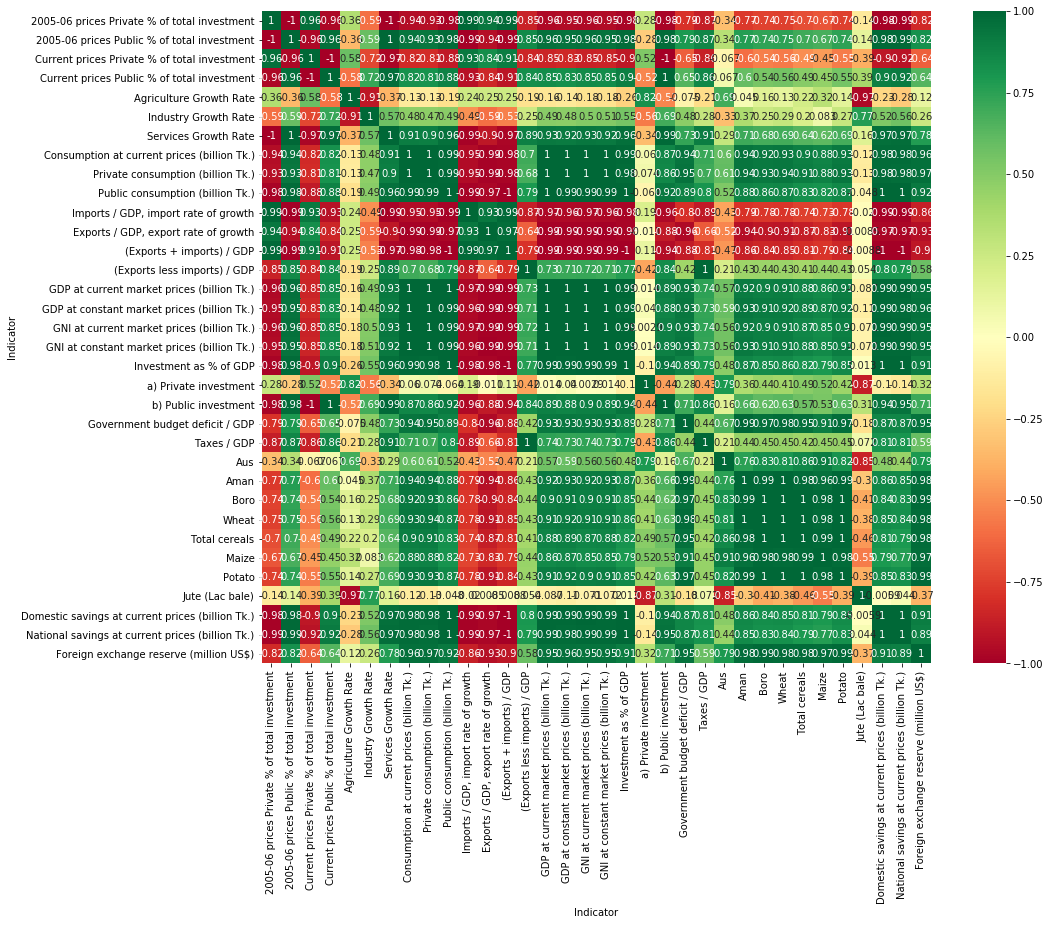

In [73]:
##Heatmap of data_1

plt.figure(figsize=(15,12))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(my_df_1.corr(), annot=True,cmap ='RdYlGn')

In [74]:
my_df_1.columns

Index(['2005-06 prices Private % of total investment',
       '2005-06 prices Public % of total investment',
       'Current prices Private % of total investment',
       'Current prices Public % of total investment',
       'Agriculture Growth Rate', 'Industry Growth Rate',
       'Services Growth Rate', 'Consumption at current prices (billion Tk.)',
       'Private consumption (billion Tk.)', 'Public consumption (billion Tk.)',
       'Imports / GDP, import rate of growth',
       'Exports / GDP, export rate of growth', '(Exports + imports) / GDP',
       '(Exports less imports) / GDP',
       'GDP at current market prices (billion Tk.)',
       'GDP at constant market prices (billion Tk.)',
       'GNI at current market prices (billion Tk.)',
       'GNI at constant market prices (billion Tk.)', 'Investment as % of GDP',
       'a) Private investment', 'b) Public investment',
       'Government budget deficit / GDP', 'Taxes / GDP', 'Aus', 'Aman', 'Boro',
       'Wheat', 'Total cerea

In [75]:
models=['Before  DecisionTreeRegressor','Before ExtraTreesClassifier','Before LinearRegression','Before RandomForestRegressor','After  DecisionTreeRegressor','After ExtraTreesClassifier','After LinearRegression','After RandomForestRegressor']

In [76]:
mse=[]
df=my_df_1
df_1=my_df_1

df=df.drop([ 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df['GDP at current market prices (billion Tk.)']=my_df_1['GDP at current market prices (billion Tk.)']
df
df_1=df_1.drop(['Taxes / GDP', 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df_1['GDP at current market prices (billion Tk.)']=my_df_1['GDP at current market prices (billion Tk.)']


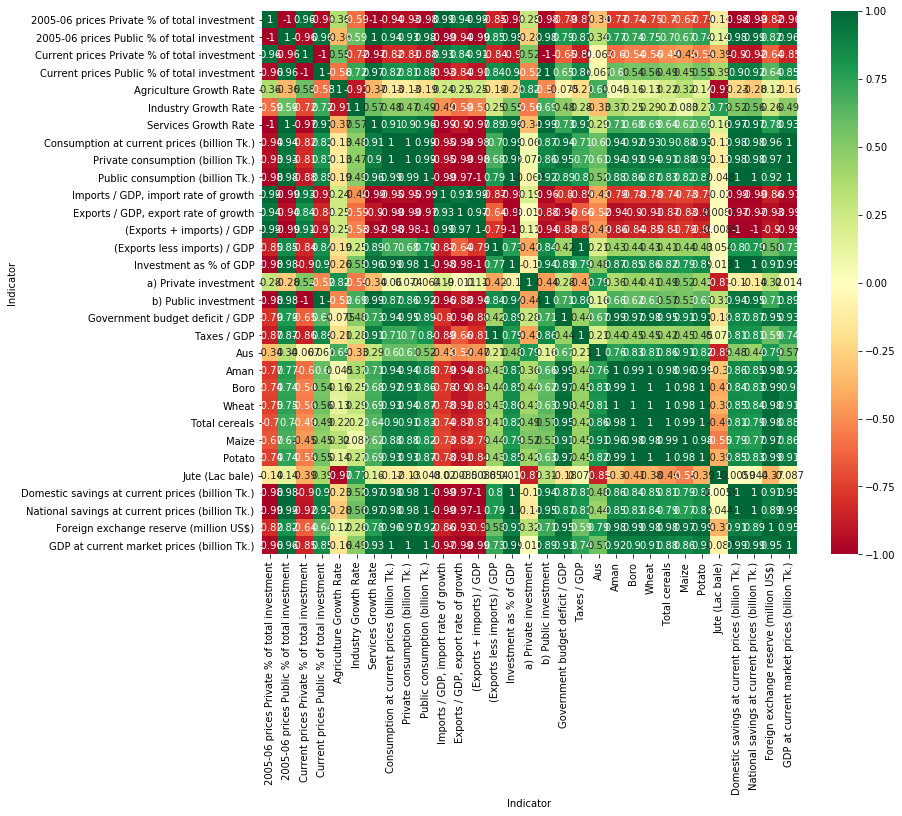

In [77]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

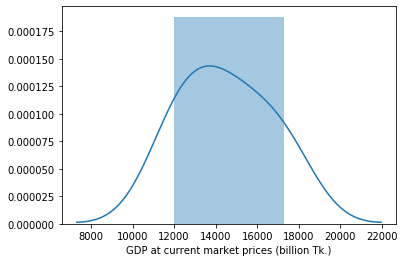

In [78]:
#histogram
sns.distplot(df['GDP at current market prices (billion Tk.)']);

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

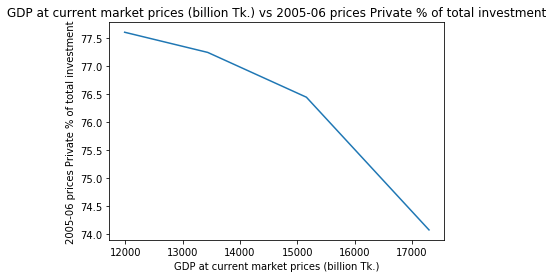

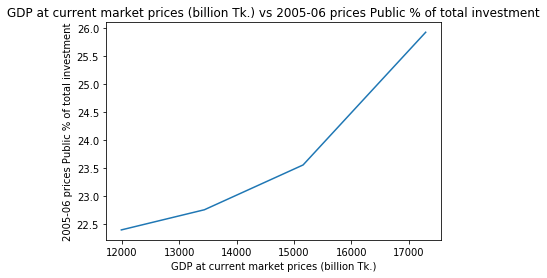

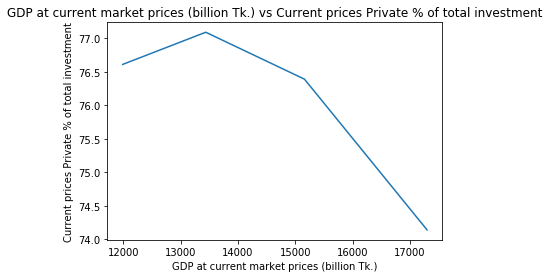

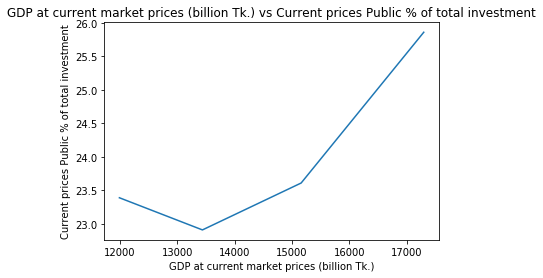

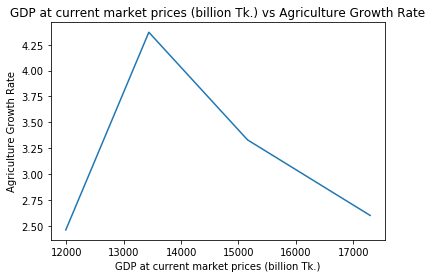

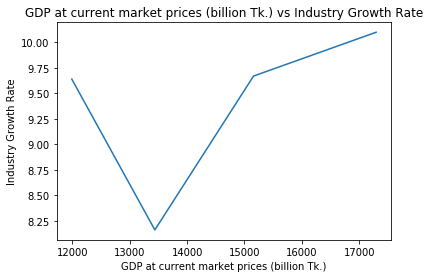

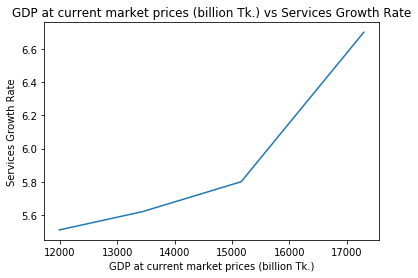

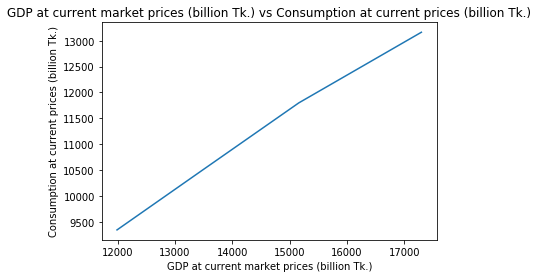

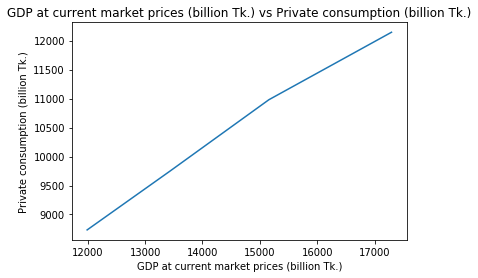

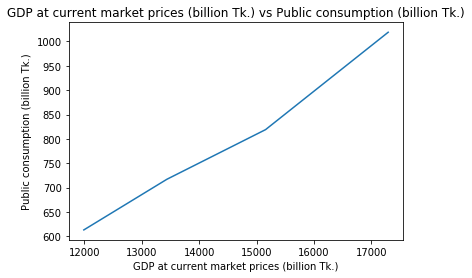

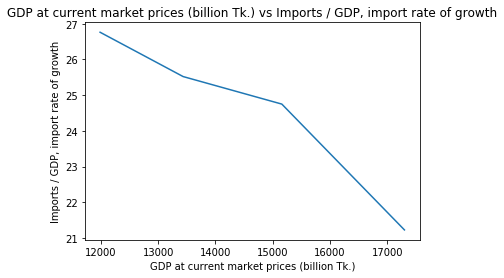

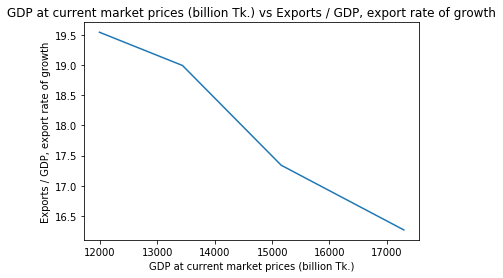

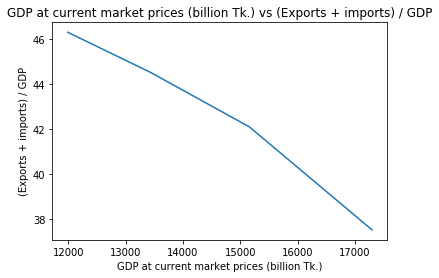

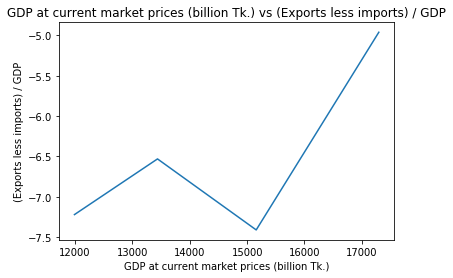

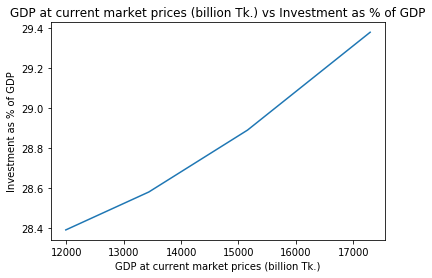

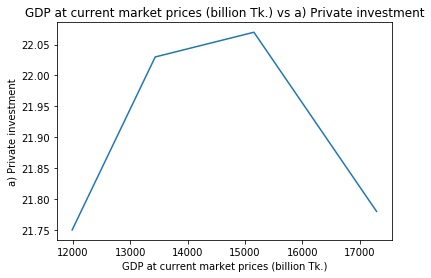

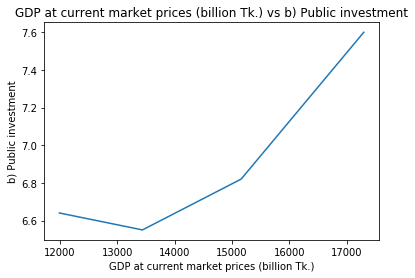

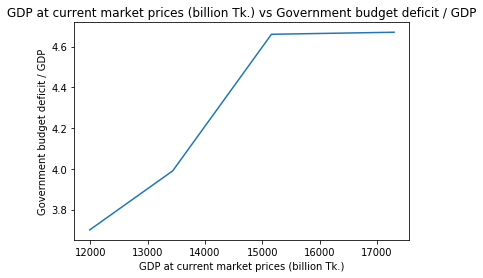

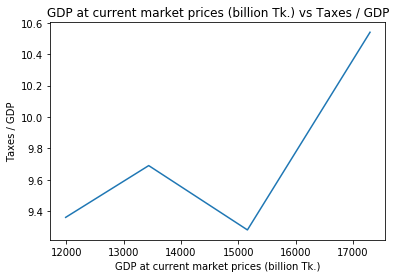

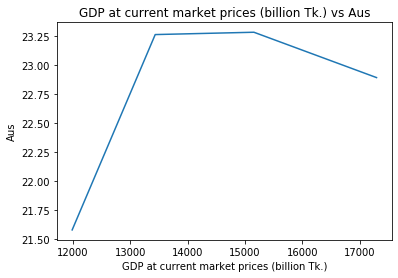

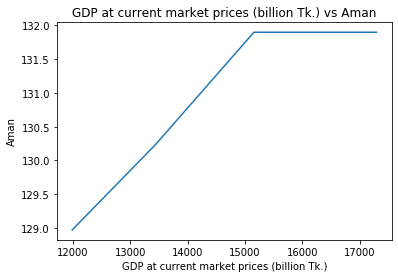

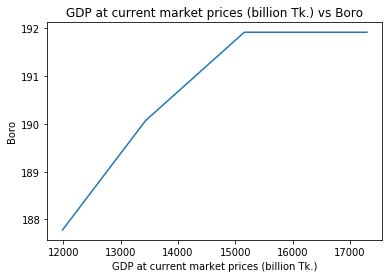

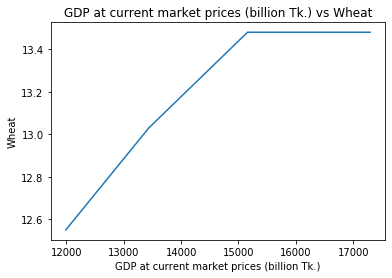

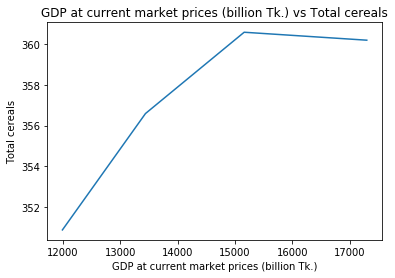

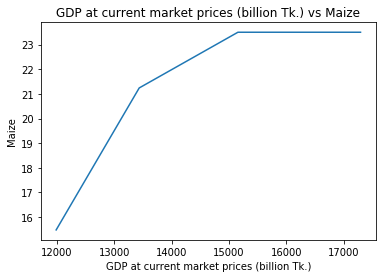

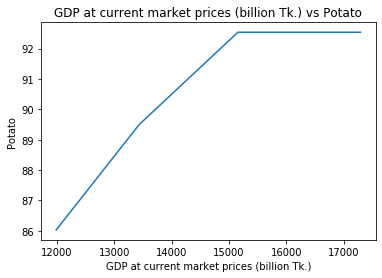

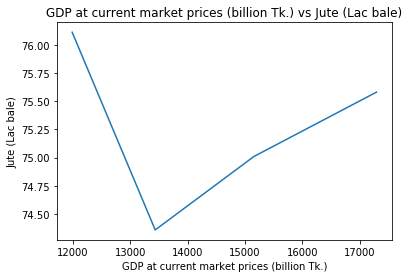

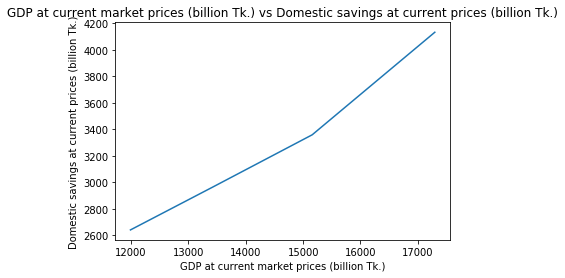

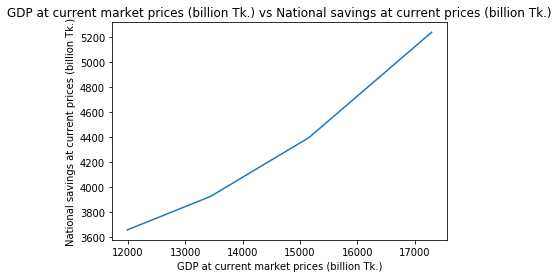

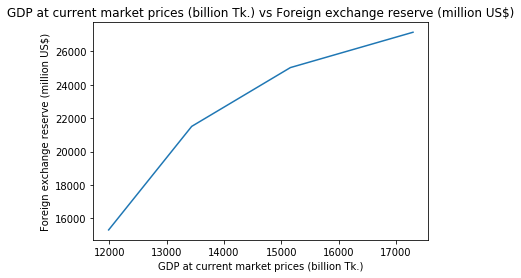

In [79]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['GDP at current market prices (billion Tk.)'],df[i])
    
    plt.title('GDP at current market prices (billion Tk.)'+' vs '+i)   
    plt.xlabel('GDP at current market prices (billion Tk.)')
    plt.ylabel(i)

In [80]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [81]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 324)               10044     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               166400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
__________________

In [82]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[13437.]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
1721.0
ExtraTreesClassifier
[17296.]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
2138.0
LinearRegression
[15234.26850297]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
76.2685029737404
RandomForestRegressor
[14362.95]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
795.0499999999993


In [83]:
#GDP at current market prices
#Private(2005-2006) invest inverse
#Public(2005-2006) invest proportional
#Private(current) invest inverse
#Public(current) invest proportional
#Agri growth proportial with a certain time
#Industry growth inverse of Agri
#Services growth proportional
#Consumption current price proportional
#private Consumption current price proportional
#public Consumption current price proportional
#import export inverse[lessening]
#investment proportional
#private investment proportional within a certain time
#public investment proportional 
#Budget deficit proportional
#taxes zig-zag
#Except jute(zigzag+industry) proportional
#Domestic, National saving, foreign exchange proportional





In [84]:
#dividing features and target values
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [85]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 324)               9720      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [86]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[17296.]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
2138.0
ExtraTreesClassifier
[13437.]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
1721.0
LinearRegression
[15234.26866669]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
76.26866669397168
RandomForestRegressor
[14493.2]
2014-15    15158.0
Name: GDP at current market prices (billion Tk.), dtype: float64
mse
664.7999999999993


In [87]:
print('Best Model')
print(models[mse.index(min(mse))])

Best Model
Before LinearRegression


In [88]:
mse=[]
df=my_df_1
##'Taxes / GDP'
df_1=my_df_1

df=df.drop([ 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df['GDP at constant market prices (billion Tk.)']=my_df_1['GDP at constant market prices (billion Tk.)']
df
df_1=df_1.drop(['Taxes / GDP', 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df_1['GDP at constant market prices (billion Tk.)']=my_df_1['GDP at constant market prices (billion Tk.)']


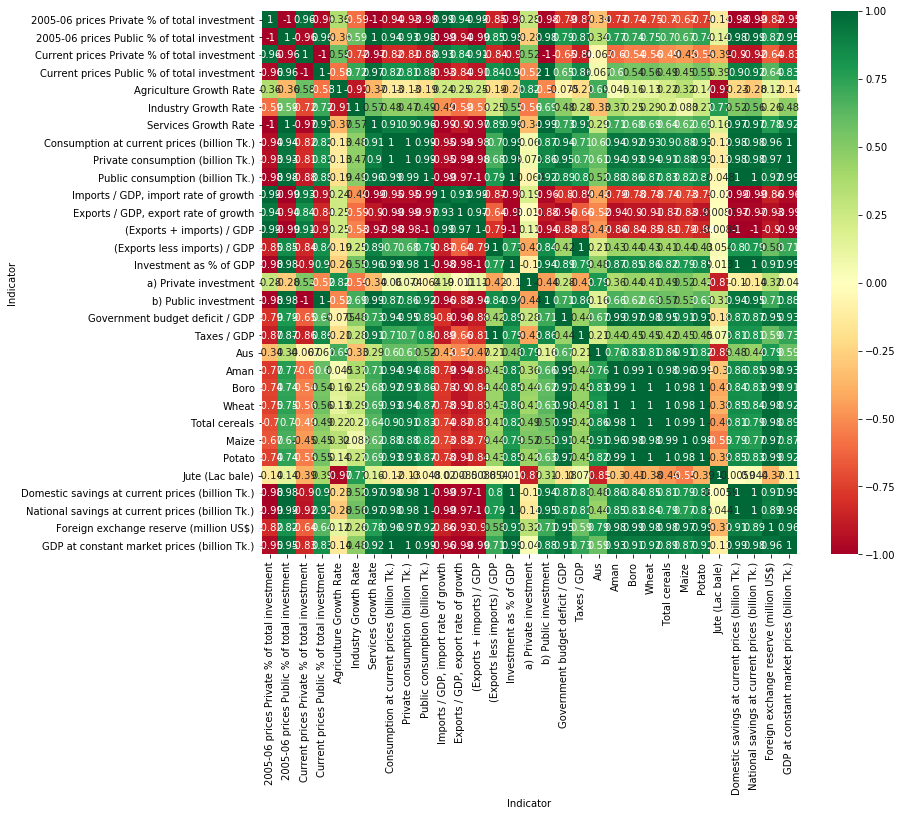

In [89]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

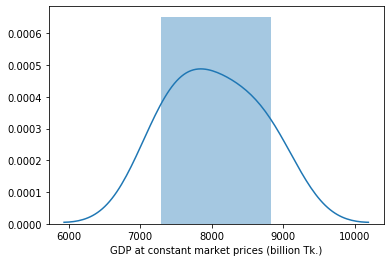

In [90]:
#histogram
sns.distplot(df['GDP at constant market prices (billion Tk.)']);

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

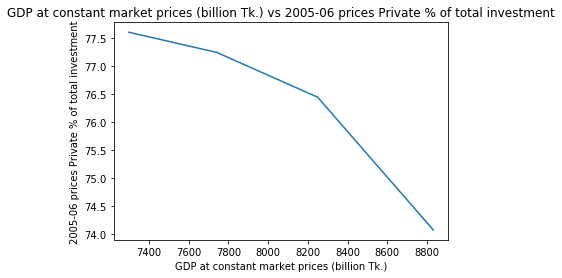

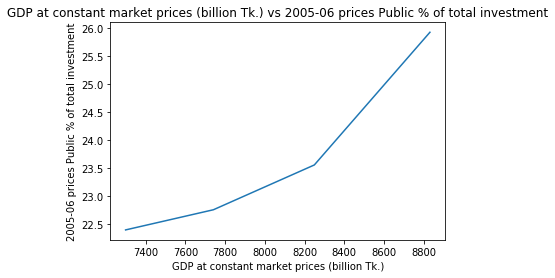

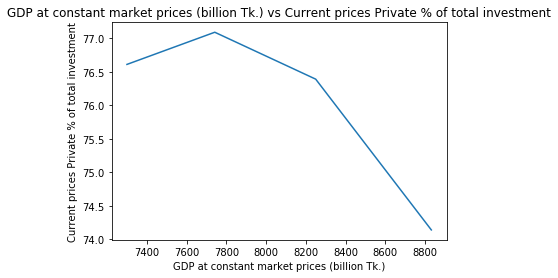

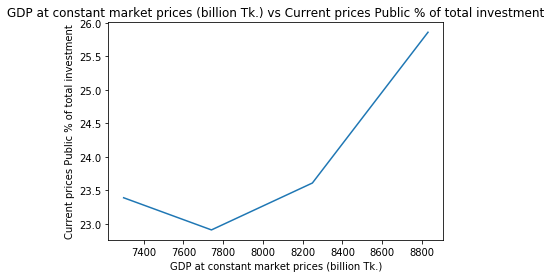

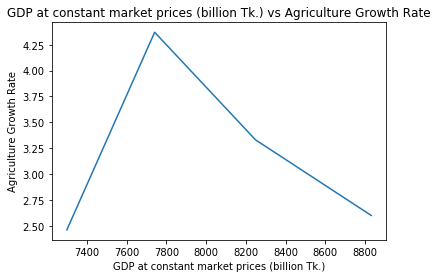

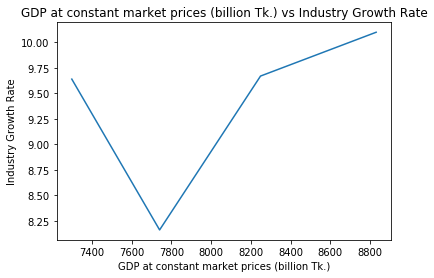

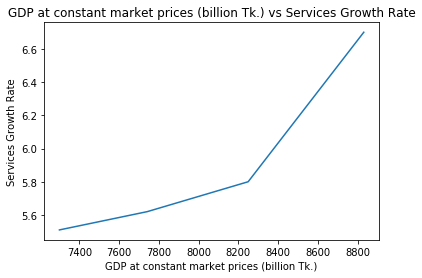

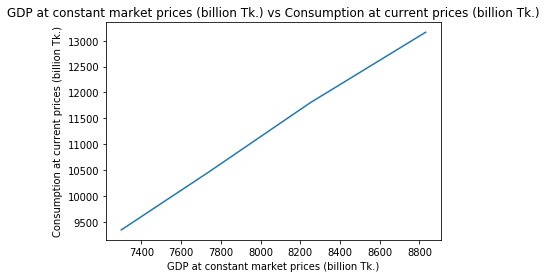

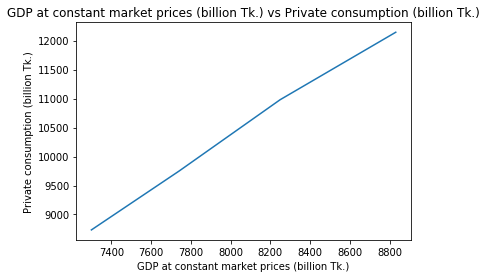

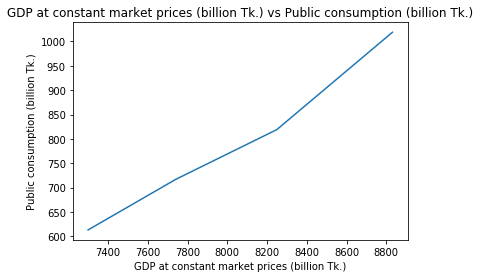

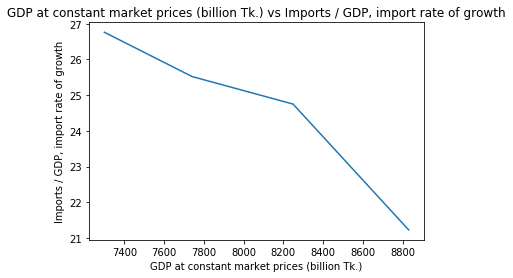

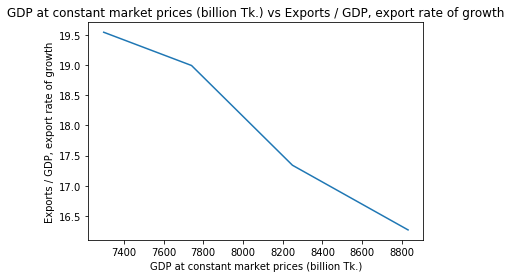

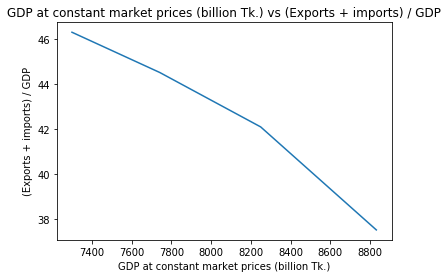

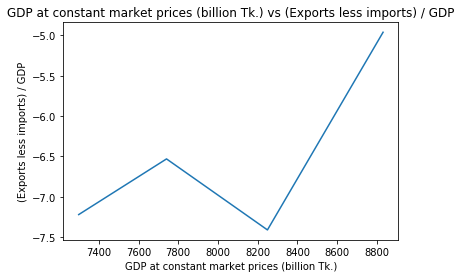

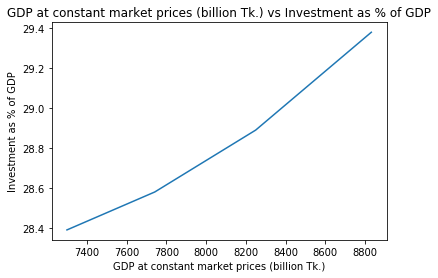

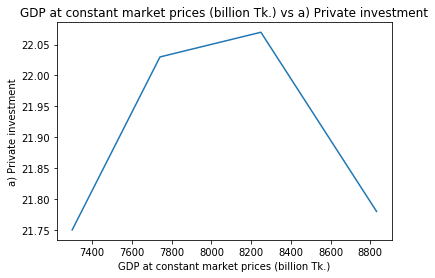

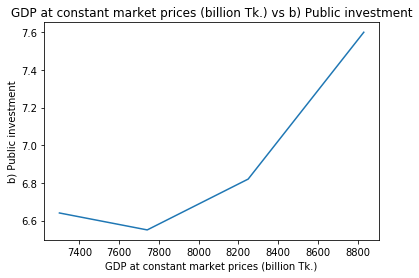

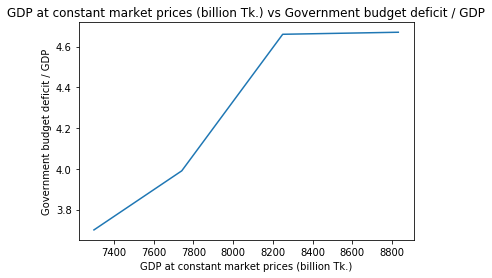

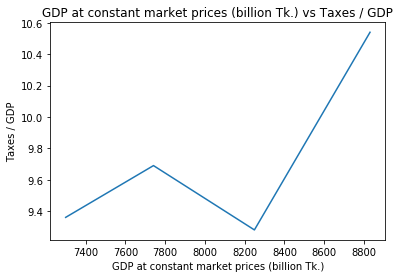

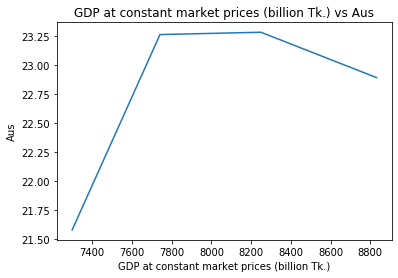

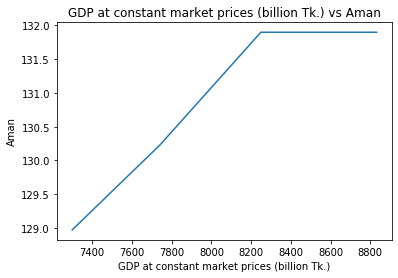

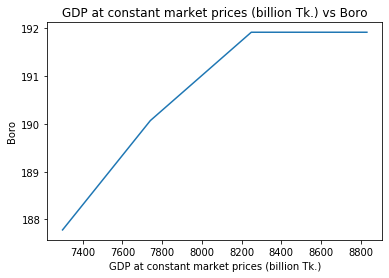

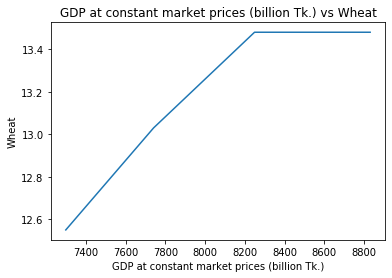

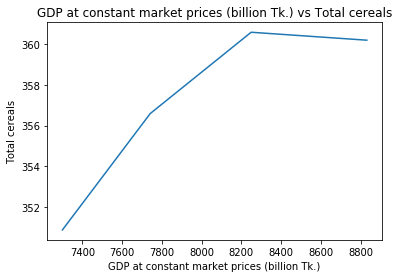

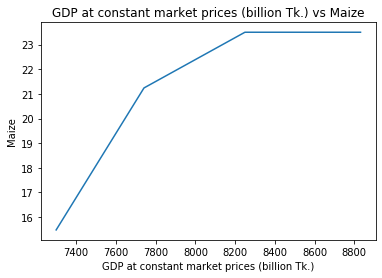

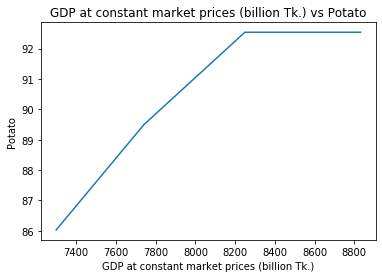

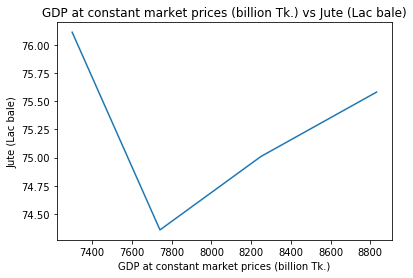

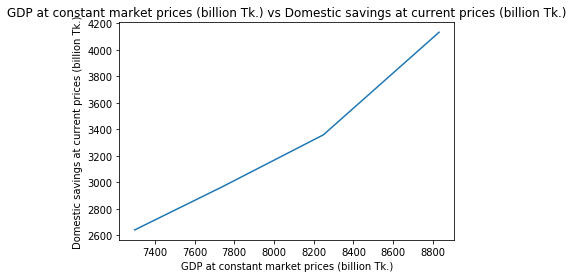

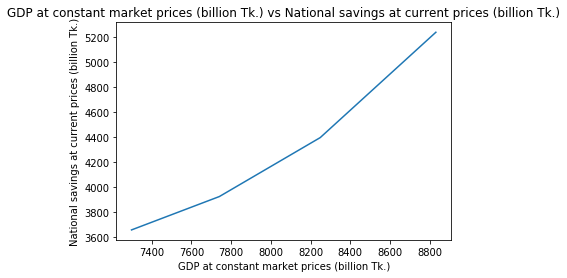

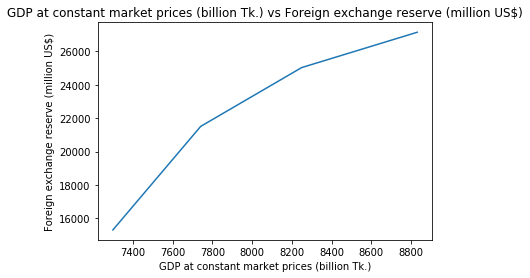

In [91]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['GDP at constant market prices (billion Tk.)'],df[i])
    
    plt.title('GDP at constant market prices (billion Tk.)'+' vs '+i)   
    plt.xlabel('GDP at constant market prices (billion Tk.)')
    plt.ylabel(i)

In [92]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [93]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 324)               10044     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [94]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[7741.]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
508.0
ExtraTreesClassifier
[7741.]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
508.0
LinearRegression
[8255.9861655]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
6.986165498468836
RandomForestRegressor
[8055.9]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
193.10000000000036


In [95]:
#GDP at constant market prices
#Private(2005-2006) invest inverse
#Public(2005-2006) invest proportional
#Private(current) invest inverse
#Public(current) invest proportional
#Agri growth proportial with a certain time
#Industry growth inverse of Agri
#Services growth proportional
#Consumption current price proportional
#private Consumption current price proportional
#public Consumption current price proportional
#import export inverse[lessening]
#investment proportional
#private investment proportional within a certain time
#public investment proportional 
#Budget deficit proportional
#taxes zig-zag
#Except jute(zigzag/industry) proportional
#Domestic, National saving, foreign exchange proportional

In [96]:
#dividing features and target values
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [97]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 324)               9720      
_________________________________________________________________
dense_28 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [98]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[8831.]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
582.0
ExtraTreesClassifier
[7741.]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
508.0
LinearRegression
[8255.98620983]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
6.98620982502689
RandomForestRegressor
[8126.02]
2014-15    8249.0
Name: GDP at constant market prices (billion Tk.), dtype: float64
mse
122.97999999999956


In [99]:
print('Best Model')
print(models[mse.index(min(mse))])

Best Model
Before LinearRegression


In [100]:
my_df_1.columns

Index(['2005-06 prices Private % of total investment',
       '2005-06 prices Public % of total investment',
       'Current prices Private % of total investment',
       'Current prices Public % of total investment',
       'Agriculture Growth Rate', 'Industry Growth Rate',
       'Services Growth Rate', 'Consumption at current prices (billion Tk.)',
       'Private consumption (billion Tk.)', 'Public consumption (billion Tk.)',
       'Imports / GDP, import rate of growth',
       'Exports / GDP, export rate of growth', '(Exports + imports) / GDP',
       '(Exports less imports) / GDP',
       'GDP at current market prices (billion Tk.)',
       'GDP at constant market prices (billion Tk.)',
       'GNI at current market prices (billion Tk.)',
       'GNI at constant market prices (billion Tk.)', 'Investment as % of GDP',
       'a) Private investment', 'b) Public investment',
       'Government budget deficit / GDP', 'Taxes / GDP', 'Aus', 'Aman', 'Boro',
       'Wheat', 'Total cerea

In [101]:
mse=[]
df=my_df_1
df_1=my_df_1
df=df.drop([ 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df['GNI at current market prices (billion Tk.)']=my_df_1['GNI at current market prices (billion Tk.)']
df
df_1=df_1.drop(['Taxes / GDP', 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df_1['GNI at current market prices (billion Tk.)']=my_df_1['GNI at current market prices (billion Tk.)']


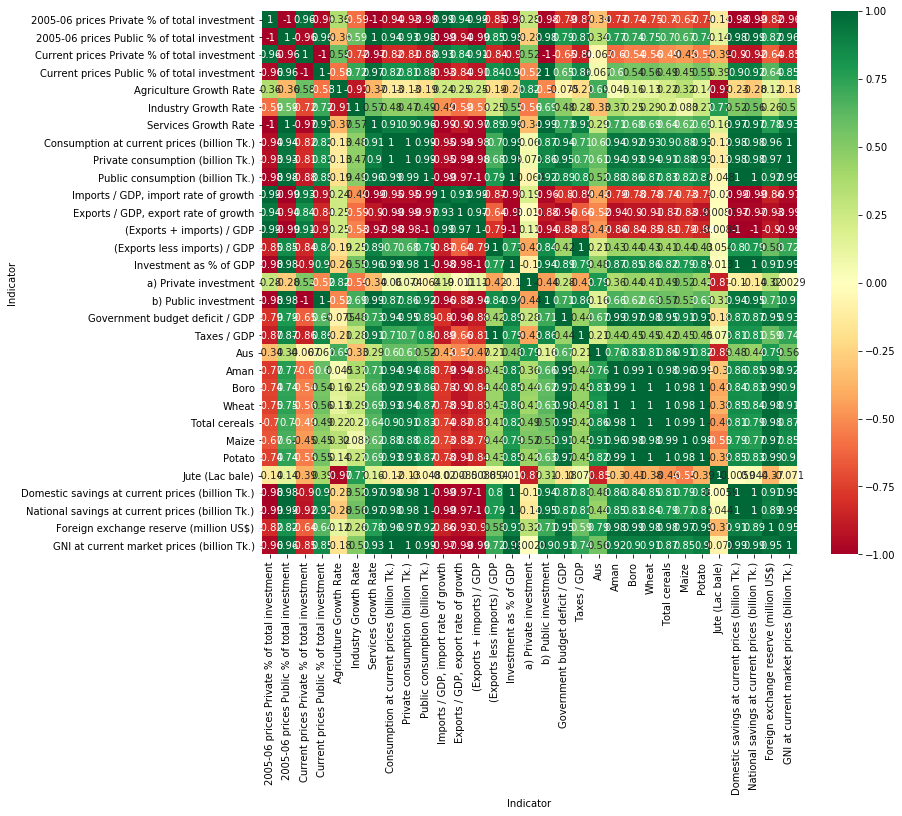

In [102]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

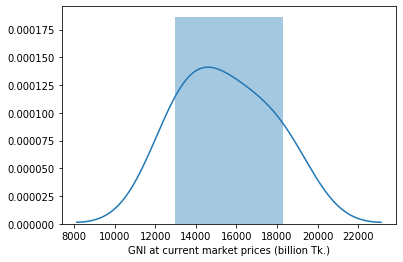

In [103]:
#histogram
sns.distplot(df['GNI at current market prices (billion Tk.)']);

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

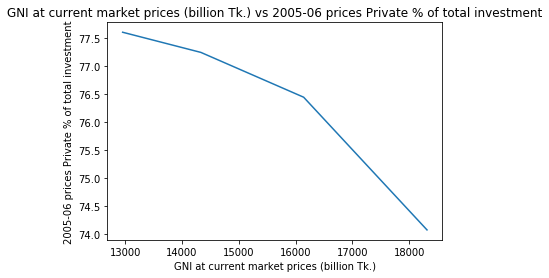

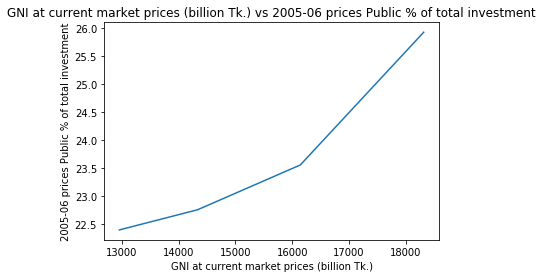

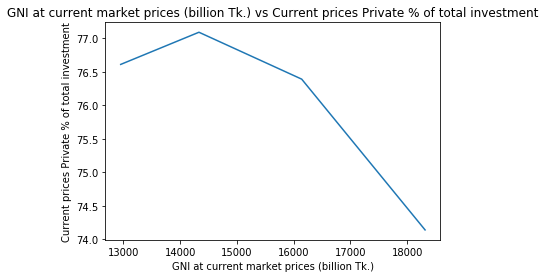

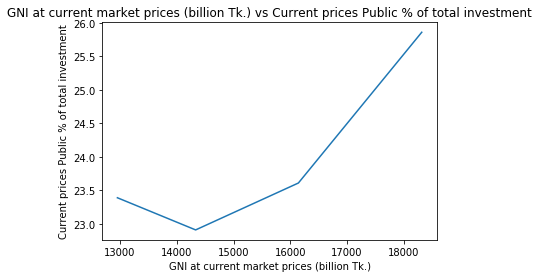

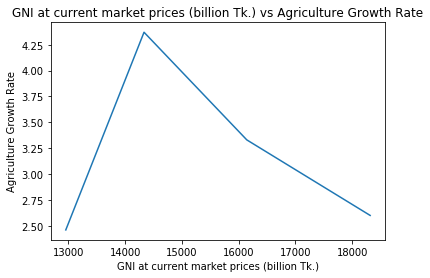

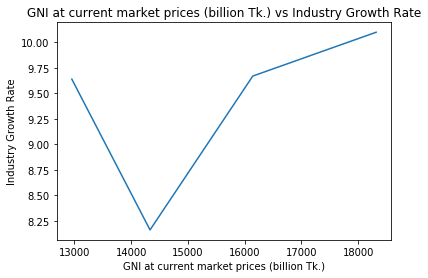

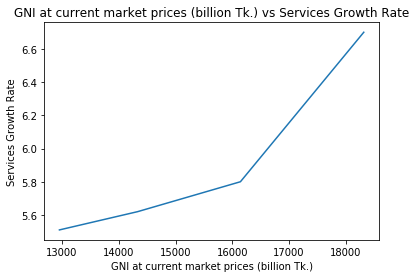

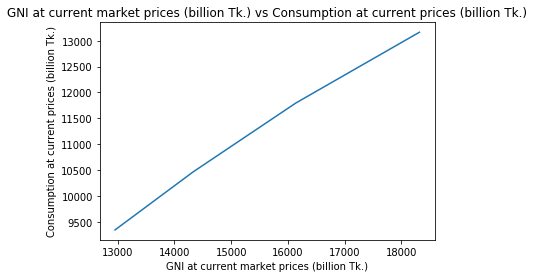

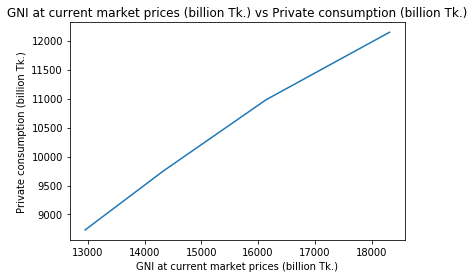

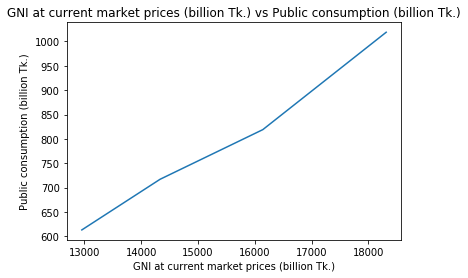

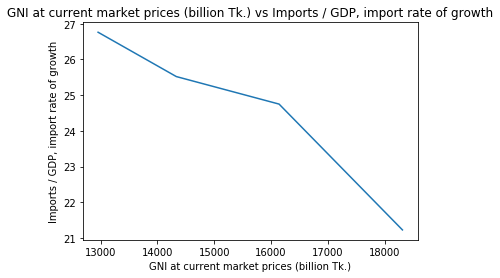

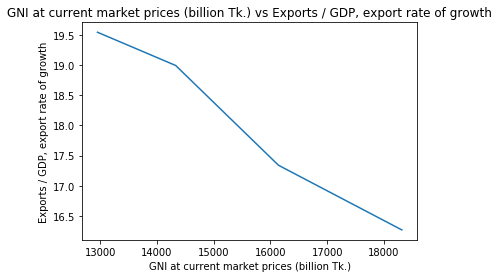

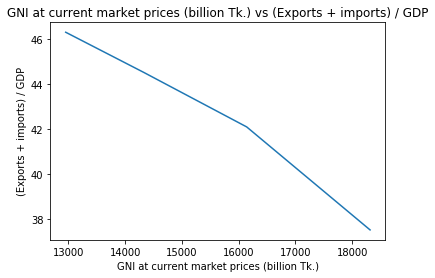

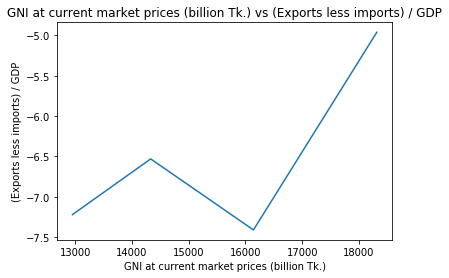

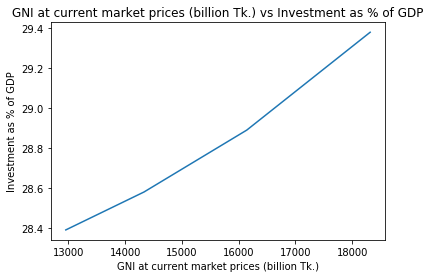

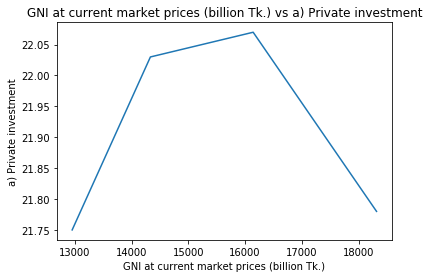

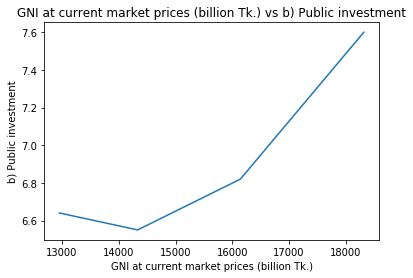

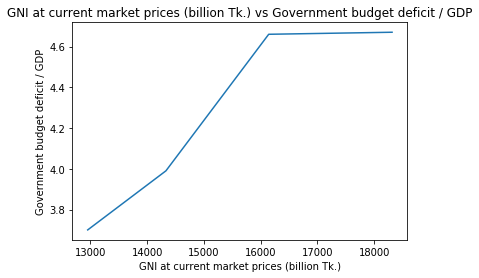

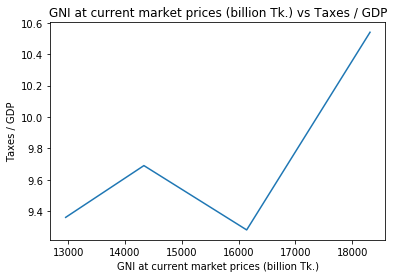

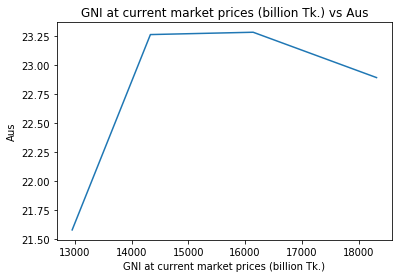

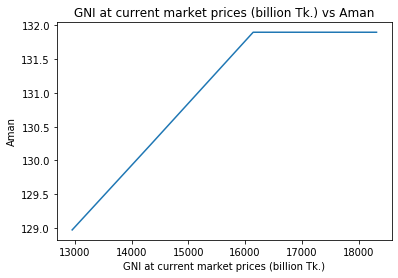

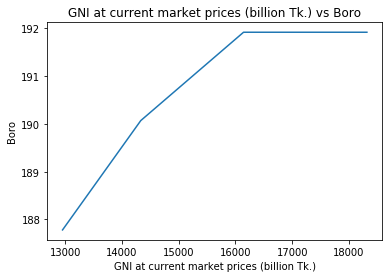

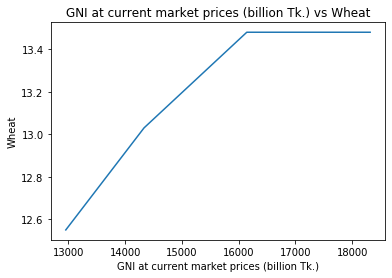

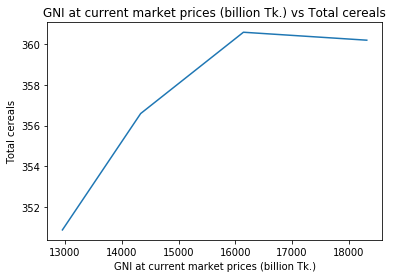

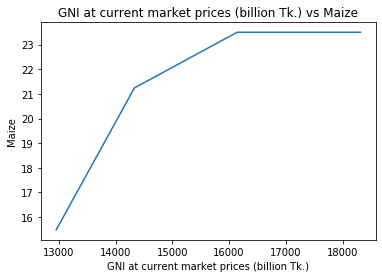

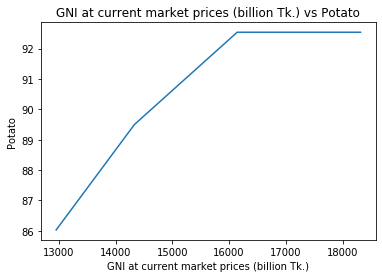

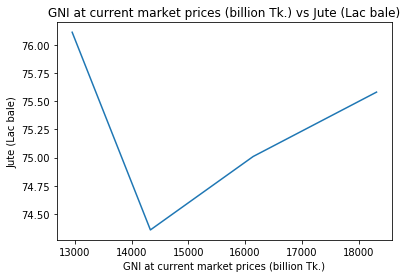

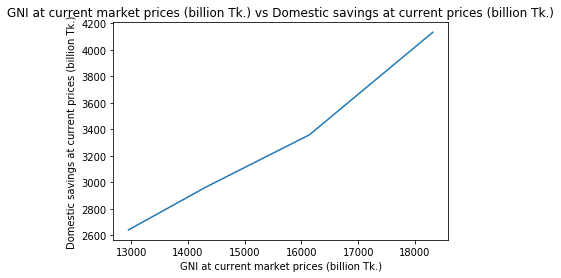

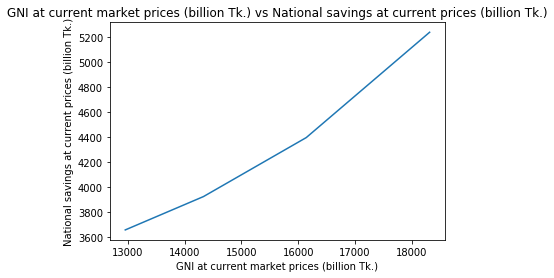

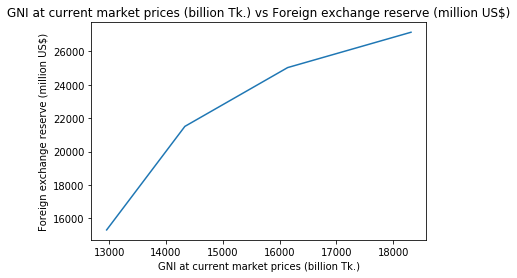

In [104]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['GNI at current market prices (billion Tk.)'],df[i])
    
    plt.title('GNI at current market prices (billion Tk.)'+' vs '+i)   
    plt.xlabel('GNI at current market prices (billion Tk.)')
    plt.ylabel(i)

In [105]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [106]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 324)               10044     
_________________________________________________________________
dense_37 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_40 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

In [107]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[14332.]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
1810.0
ExtraTreesClassifier
[18315.]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
2173.0
LinearRegression
[16161.11785688]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
19.11785687532938
RandomForestRegressor
[15701.7]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
440.2999999999993


In [108]:
#GNI at current market prices
#Private(2005-2006) invest inverse
#Public(2005-2006) invest proportional
#Private(current) invest inverse
#Public(current) invest proportional
#Agri growth proportial with a certain time
#Industry growth inverse of Agri
#Services growth proportional
#Consumption current price proportional
#private Consumption current price proportional
#public Consumption current price proportional
#import export inverse[lessening]
#investment proportional
#private investment proportional within a certain time
#public investment proportional 
#Budget deficit proportional
#taxes zig-zag
#Except jute(zigzag/industry) proportional
#Domestic, National saving, foreign exchange proportional

In [109]:
#dividing features and target values
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [110]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 324)               9720      
_________________________________________________________________
dense_46 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_49 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_50 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)              

In [111]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[18315.]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
2173.0
ExtraTreesClassifier
[14332.]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
1810.0
LinearRegression
[16161.11803263]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
19.11803262603098
RandomForestRegressor
[15704.72]
2014-15    16142.0
Name: GNI at current market prices (billion Tk.), dtype: float64
mse
437.28000000000065


In [112]:
print('Best Model')
print(models[mse.index(min(mse))])

Best Model
Before LinearRegression


In [113]:
mse=[]
df=my_df_1
df_1=my_df_1
#'Taxes / GDP'
df=df.drop([ 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df['GNI at constant market prices (billion Tk.)']=my_df_1['GNI at constant market prices (billion Tk.)']
df
df_1=df_1.drop(['Taxes / GDP', 'GDP at current market prices (billion Tk.)','GDP at constant market prices (billion Tk.)','GNI at current market prices (billion Tk.)', 'GNI at constant market prices (billion Tk.)'], axis = 1)
df_1['GNI at constant market prices (billion Tk.)']=my_df_1['GNI at constant market prices (billion Tk.)']

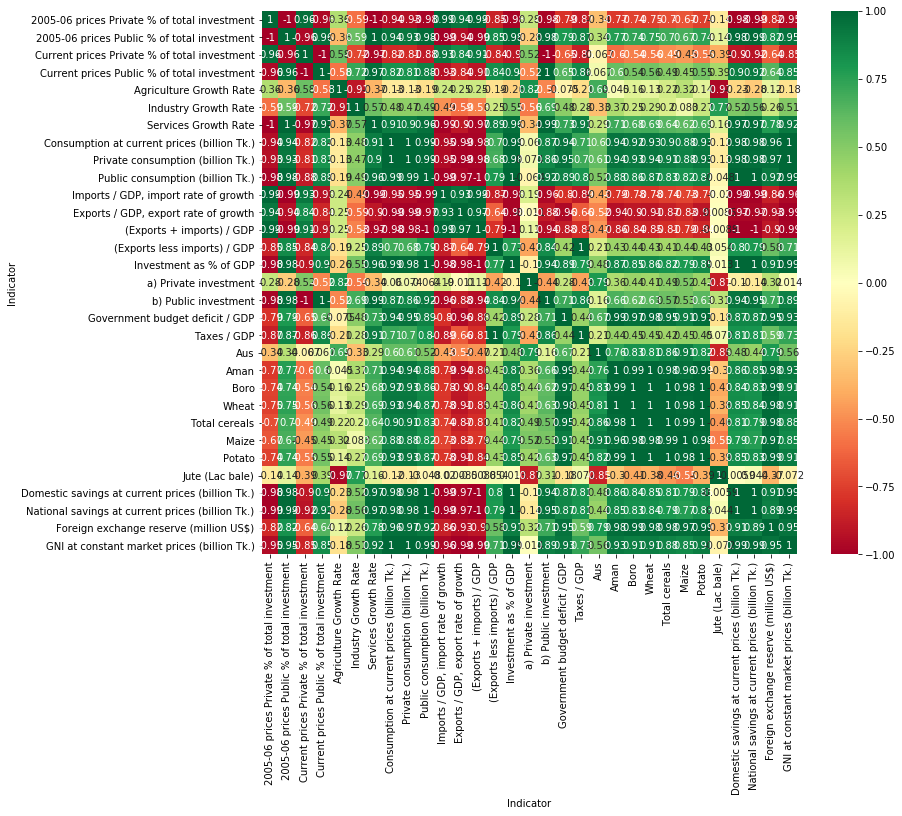

In [114]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

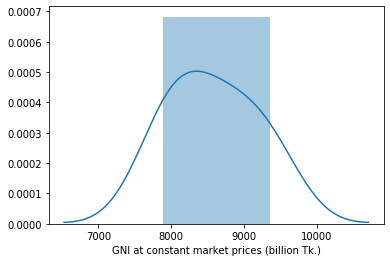

In [115]:
#histogram
sns.distplot(df['GNI at constant market prices (billion Tk.)']);

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

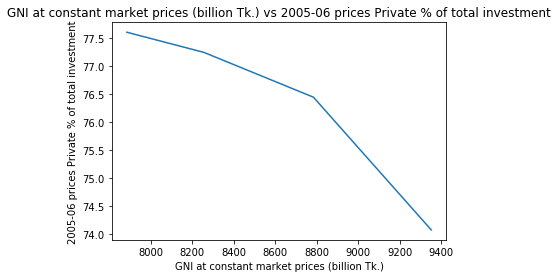

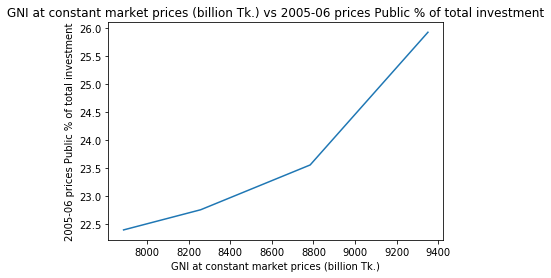

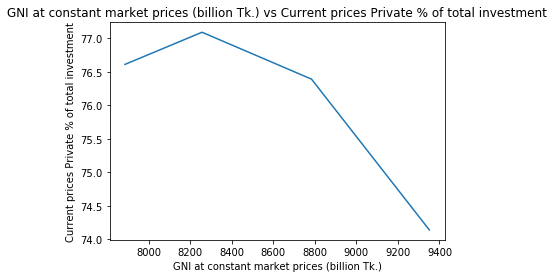

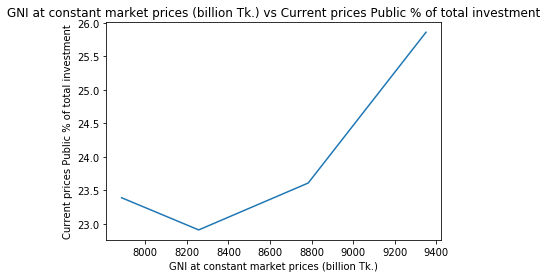

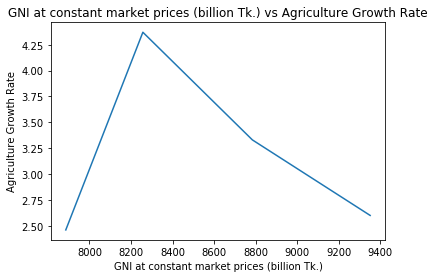

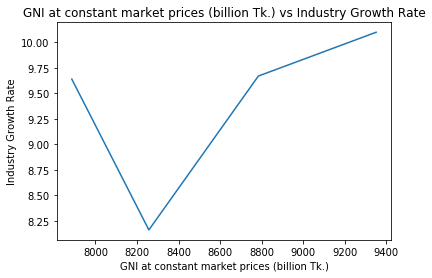

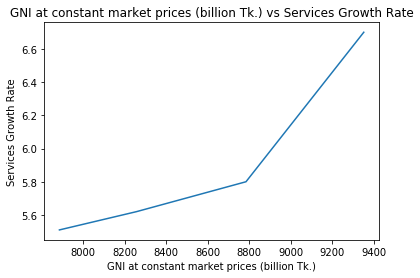

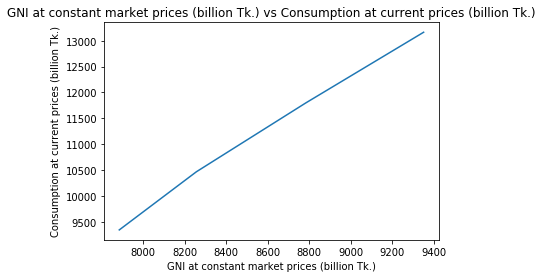

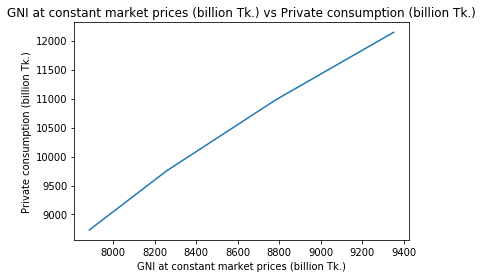

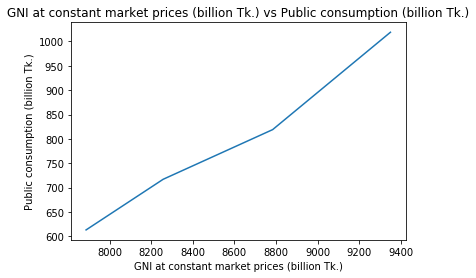

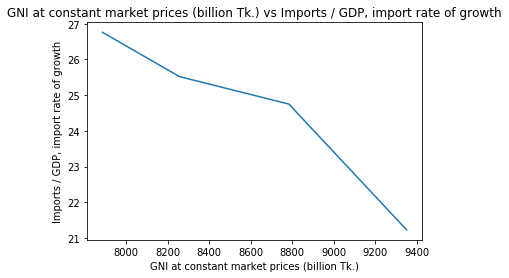

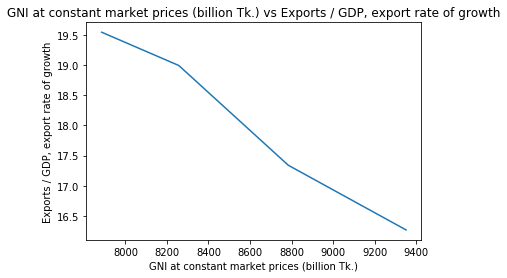

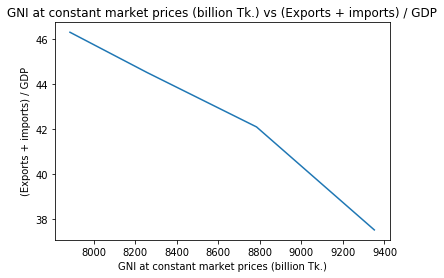

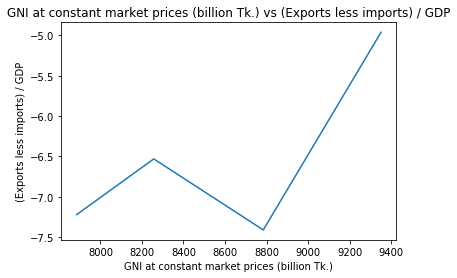

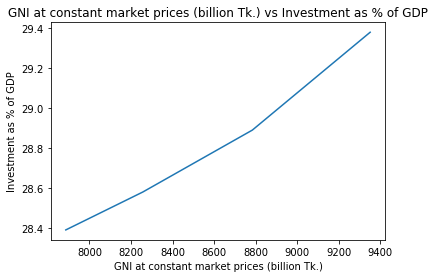

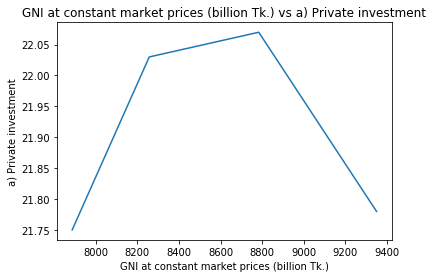

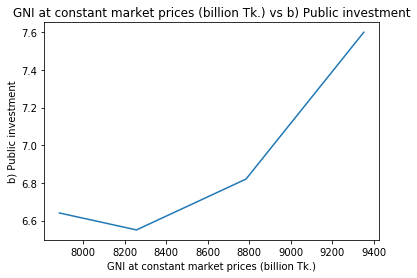

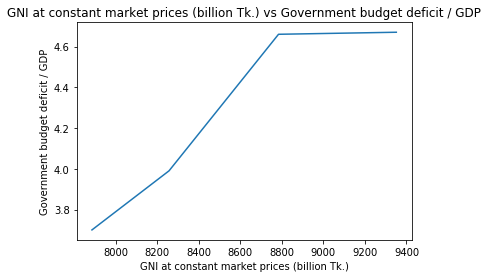

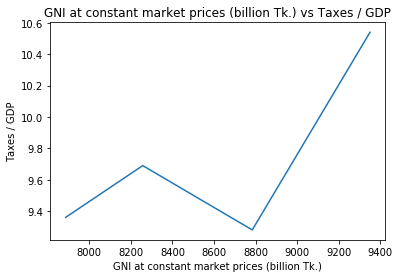

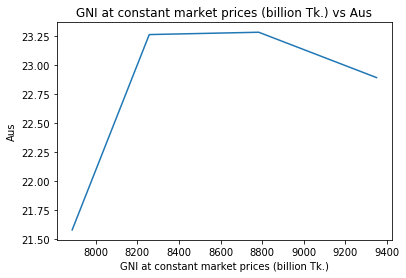

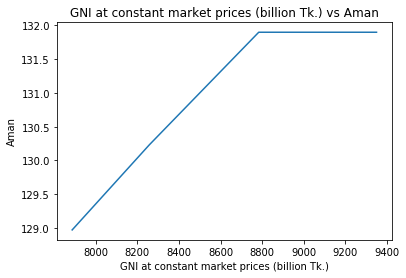

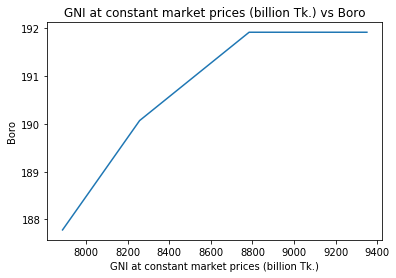

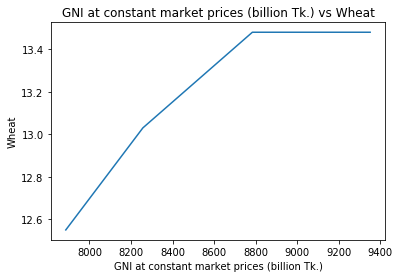

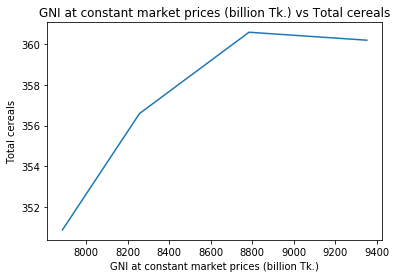

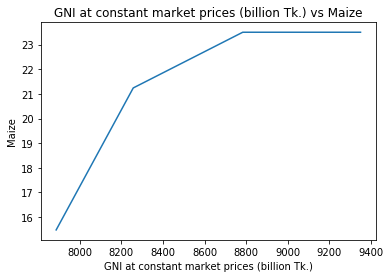

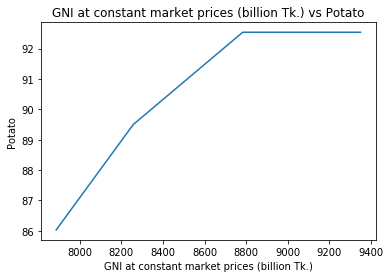

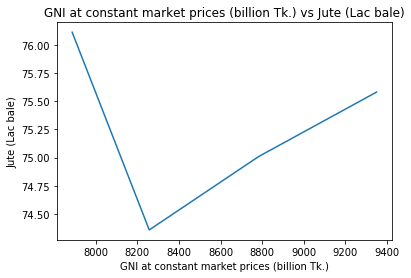

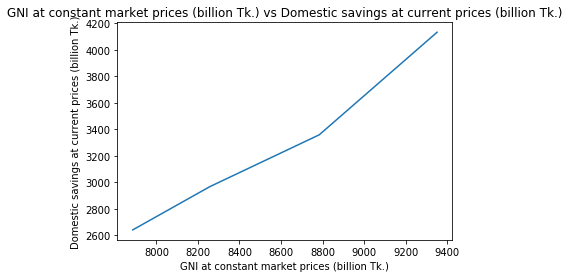

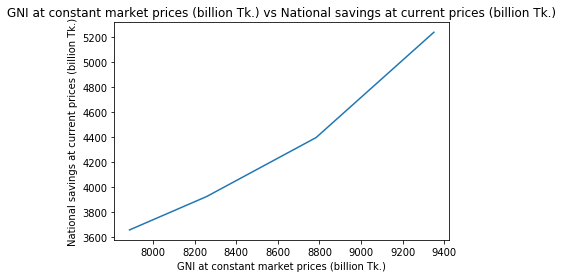

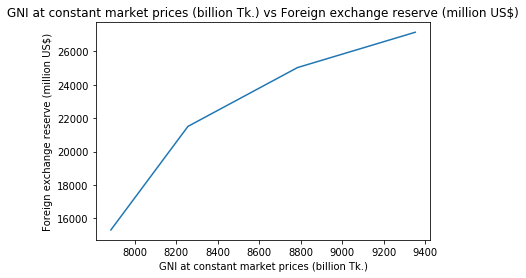

In [116]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['GNI at constant market prices (billion Tk.)'],df[i])
    
    plt.title('GNI at constant market prices (billion Tk.)'+' vs '+i)   
    plt.xlabel('GNI at constant market prices (billion Tk.)')
    plt.ylabel(i)

In [117]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [118]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 324)               10044     
_________________________________________________________________
dense_55 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_57 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_58 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)              

In [119]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[8257.]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
527.0
ExtraTreesClassifier
[9351.]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
567.0
LinearRegression
[8757.73371013]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
26.266289870898618
RandomForestRegressor
[8485.22]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
298.78000000000065


In [120]:
#GNI at constant market prices
#Private(2005-2006) invest inverse
#Public(2005-2006) invest proportional
#Private(current) invest inverse
#Public(current) invest proportional
#Agri growth proportial with a certain time
#Industry growth inverse of Agri
#Services growth proportional
#Consumption current price proportional
#private Consumption current price proportional
#public Consumption current price proportional
#import export inverse[lessening with growth]
#investment proportional
#private investment proportional within a certain time
#public investment proportional 
#Budget deficit proportional
#taxes zig-zag
#Except jute(zigzag/industry) proportional
#Domestic, National saving, foreign exchange proportional

In [121]:
#dividing features and target values
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [122]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 324)               9720      
_________________________________________________________________
dense_64 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_65 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_66 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_67 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_68 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)              

In [123]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[9351.]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
567.0
ExtraTreesClassifier
[8257.]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
527.0
LinearRegression
[8757.73375884]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
26.266241162695223
RandomForestRegressor
[8561.8]
2014-15    8784.0
Name: GNI at constant market prices (billion Tk.), dtype: float64
mse
222.20000000000073


In [124]:
print('Best Model')
print(models[mse.index(min(mse))])

Best Model
After LinearRegression


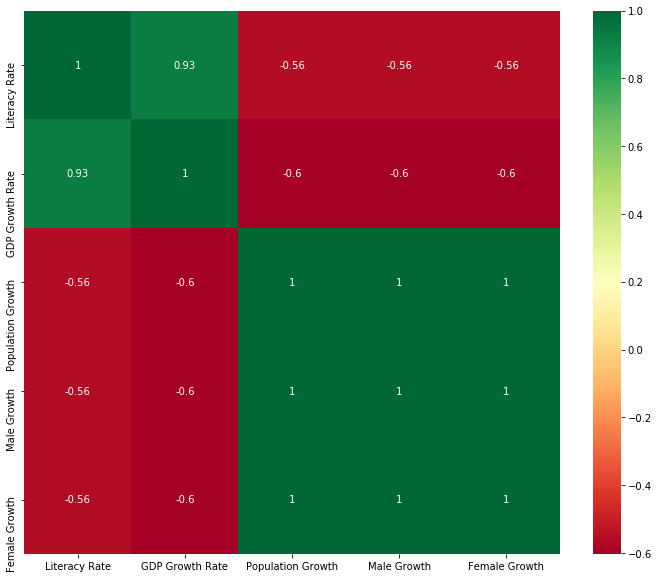

In [125]:
##Heatmap of data_2

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(my_df_2.corr(), annot=True,cmap ='RdYlGn')

In [126]:
df=my_df_2

df=df.drop([ 'GDP Growth Rate'], axis = 1)
df['GDP Growth Rate']=my_df_2['GDP Growth Rate']
df

Literacy Rate  Population Growth  Male Growth  Female Growth  \
Year                                                                 
1981          29.23            2228817      1154828        1073989   
1991          35.32            2554554      1323603        1230951   
2001          47.49            2514896      1303055        1211841   
2013          59.72            1875891       971964         903927   

      GDP Growth Rate  
Year                   
1981              3.8  
1991              3.3  
2001              5.3  
2013              6.0

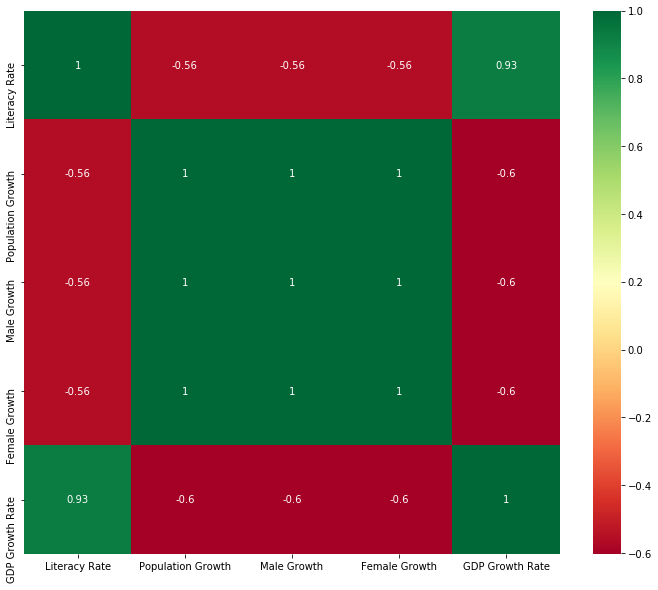

In [127]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

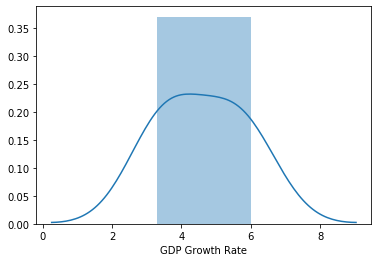

In [128]:
#histogram
sns.distplot(df['GDP Growth Rate']);

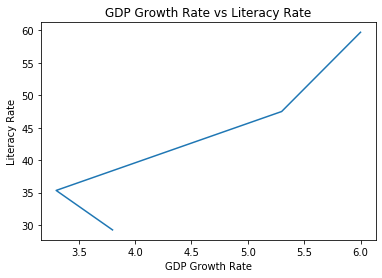

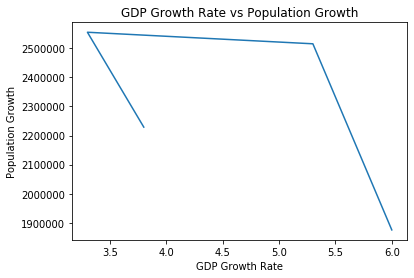

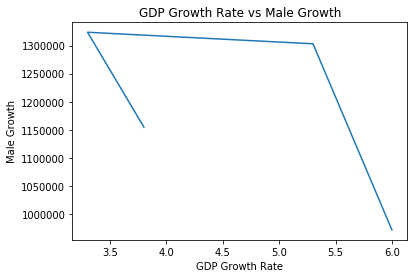

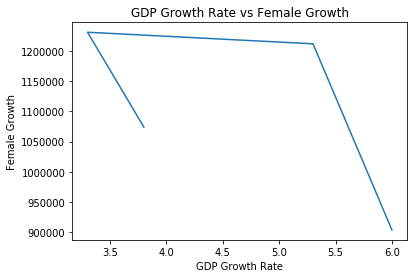

In [129]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['GDP Growth Rate'],df[i])
    
    plt.title('GDP Growth Rate'+' vs '+i)   
    plt.xlabel('GDP Growth Rate')
    plt.ylabel(i)

In [130]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [131]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 324)               1620      
_________________________________________________________________
dense_73 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_74 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_75 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_76 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_77 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)              

In [132]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
#print('ExtraTreesClassifier')
#model = ExtraTreesClassifier()
#model.fit(X_train,y_train)
#print(model.predict(X_test))
#print(y_test)
#print('mse')
#print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[3.3]
Year
2001    5.3
Name: GDP Growth Rate, dtype: float64
mse
2.0
LinearRegression
[3.90651]
Year
2001    5.3
Name: GDP Growth Rate, dtype: float64
mse
1.3934899990950909
RandomForestRegressor
[3.535]
Year
2001    5.3
Name: GDP Growth Rate, dtype: float64
mse
1.7649999999999944


In [133]:
#GDP growth 
#literacy proportional with GDP
#Population inverse after a certain time
#LinearRegression Good


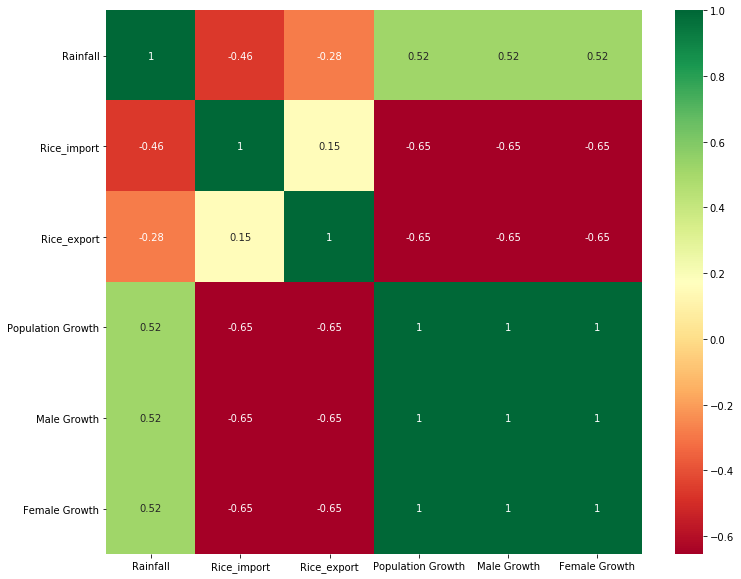

In [134]:
##Heatmap of data_3

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(my_df_3.corr(), annot=True,cmap ='RdYlGn')

In [135]:
df=my_df_3

df=df.drop(['Rice_import', 'Rice_export'], axis = 1)
df['Rice_import']=my_df_3['Rice_import']
df

Rainfall  Population Growth  Male Growth  Female Growth  Rice_import
Year                                                                      
2000  6.738633            2555578      1324134        1231444      23055.0
2001  6.374885            2514896      1303055        1211841      25939.0
2002  6.928264            2473858      1281792        1192066      26138.0
2003  5.805187            2412055      1249769        1162286      25797.0
2004  6.791667            2307665      1195681        1111984      26803.0
2005  6.571790            2164903      1121712        1043191      26643.0
2006  5.490275            1997726      1035091         962635      29808.0
2007  6.751423            1831354       948888         882466      28481.0
2008  6.273041            1706617       884257         822360      27110.0
2009  5.735023            1656575       858329         798246      29298.0
2010  5.392627            1682152       871582         810570      34004.0
2011  6.267127            1749888       906678         843210      36836.0
2012  6.024040            1820305       943163         877142      36342.0
2013  5.960445            1875891       971964         903927      41054.0

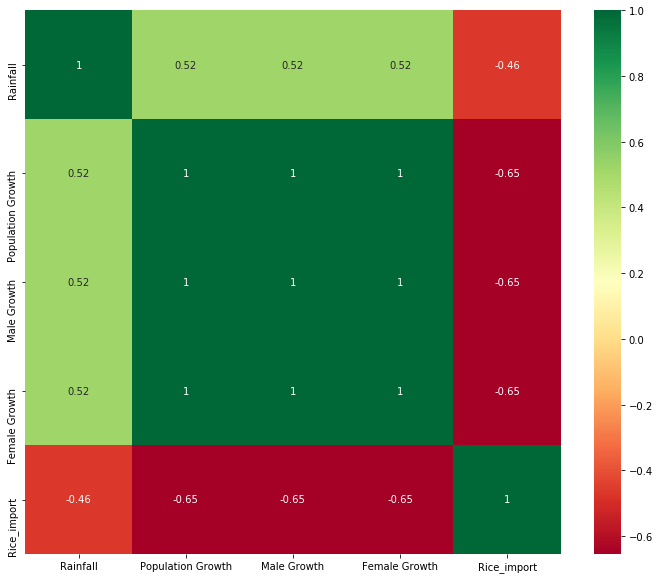

In [136]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

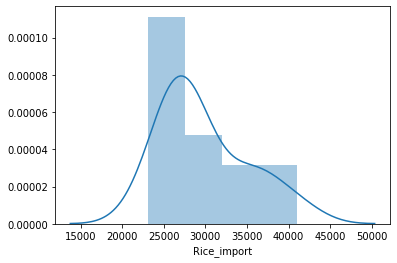

In [137]:
#histogram
sns.distplot(df['Rice_import']);

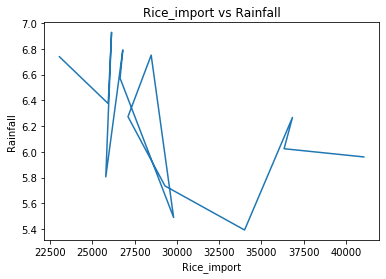

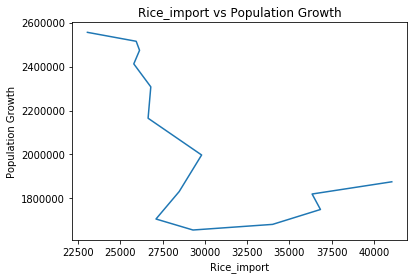

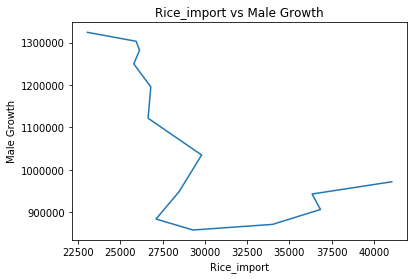

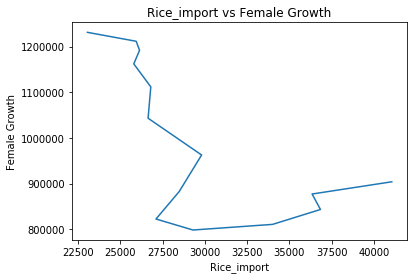

In [138]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['Rice_import'],df[i])
    
    plt.title('Rice_import'+' vs '+i)   
    plt.xlabel('Rice_import')
    plt.ylabel(i)

In [139]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [140]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 324)               1620      
_________________________________________________________________
dense_82 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_83 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_84 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_85 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_86 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)              

In [141]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[34004. 41054. 26138. 34004.]
Year
2008    27110.0
2006    29808.0
2004    26803.0
2011    36836.0
Name: Rice_import, dtype: float64
mse
6753.928504951767
ExtraTreesClassifier
[34004. 41054. 25797. 36342.]
Year
2008    27110.0
2006    29808.0
2004    26803.0
2011    36836.0
Name: Rice_import, dtype: float64
mse
6619.2111312451725
LinearRegression
[35208.97847182 32792.76297101 28182.61181785 32276.60287448]
Year
2008    27110.0
2006    29808.0
2004    26803.0
2011    36836.0
Name: Rice_import, dtype: float64
mse
4929.343090015595
RandomForestRegressor
[31727.45 35475.29 26118.37 32081.64]
Year
2008    27110.0
2006    29808.0
2004    26803.0
2011    36836.0
Name: Rice_import, dtype: float64
mse
4373.547693037656


In [142]:
#Rice import 
#no relatin all zig-zag

In [143]:
df=my_df_3

df=df.drop(['Rice_import', 'Rice_export'], axis = 1)
df['Rice_export']=my_df_3['Rice_export']
df

Rainfall  Population Growth  Male Growth  Female Growth  Rice_export
Year                                                                      
2000  6.738633            2555578      1324134        1231444          500
2001  6.374885            2514896      1303055        1211841          400
2002  6.928264            2473858      1281792        1192066          242
2003  5.805187            2412055      1249769        1162286          188
2004  6.791667            2307665      1195681        1111984          238
2005  6.571790            2164903      1121712        1043191         4054
2006  5.490275            1997726      1035091         962635         6034
2007  6.751423            1831354       948888         882466         5973
2008  6.273041            1706617       884257         822360         7063
2009  5.735023            1656575       858329         798246         3455
2010  5.392627            1682152       871582         810570         2922
2011  6.267127            1749888       906678         843210          821
2012  6.024040            1820305       943163         877142         2767
2013  5.960445            1875891       971964         903927         3386

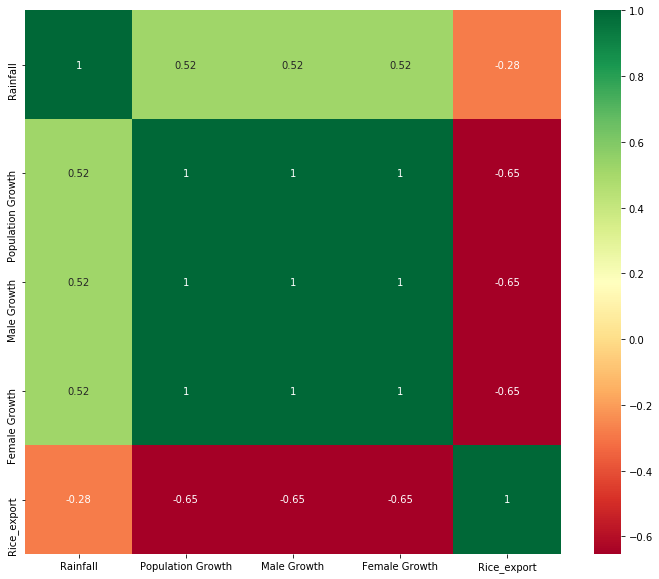

In [144]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

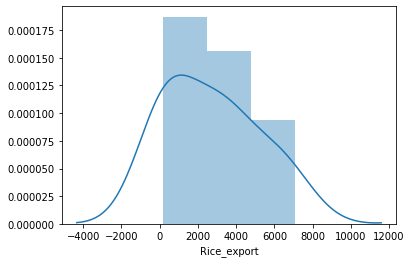

In [145]:
#histogram
sns.distplot(df['Rice_export']);

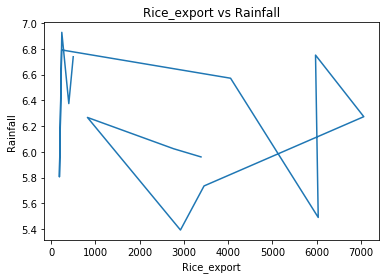

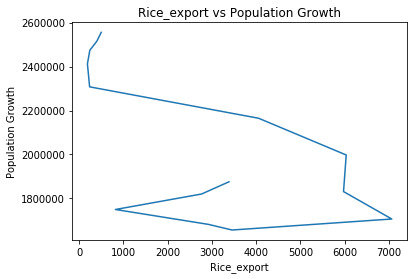

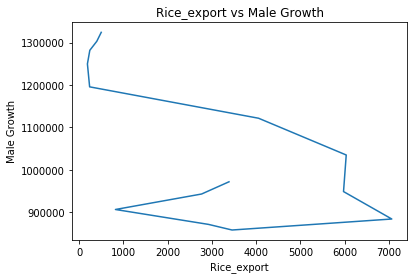

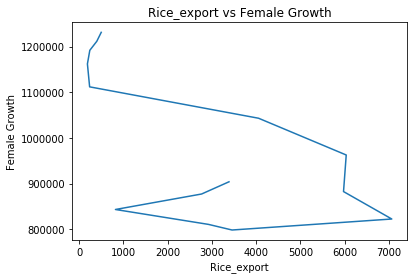

In [146]:
for i in df.columns[:-1]:

    plt.figure()
    plt.plot(df['Rice_export'],df[i])
    
    plt.title('Rice_export'+' vs '+i)   
    plt.xlabel('Rice_export')
    plt.ylabel(i)

In [147]:
#dividing features and target values
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [148]:
model = Sequential()

# The Input Layer :
model.add(Dense(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the network :
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
results = model.evaluate(X_test, y_test)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 324)               1620      
_________________________________________________________________
dense_91 (Dense)             (None, 512)               166400    
_________________________________________________________________
dense_92 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_94 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_95 (Dense)             (None, 256)               131328    
_________________________________________________________________
flatten_10 (Flatten)         (None, 256)             

In [149]:
model = DecisionTreeRegressor(random_state=1)
# Fit model
model.fit(X_train, y_train)
print('DecisionTreeRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
print('ExtraTreesClassifier')
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
##
model = LinearRegression()
model.fit(X_train, y_train)
print('LinearRegression')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))
####
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('RandomForestRegressor')
print(model.predict(X_test))
print(y_test)
print('mse')
print(mean_squared_error(y_test, model.predict(X_test), squared=False))

DecisionTreeRegressor
[2767. 2922.  188. 2767.]
Year
2008    7063
2006    6034
2004     238
2011     821
Name: Rice_export, dtype: int64
mse
2825.313079996622
ExtraTreesClassifier
[2922 3386  188 2767]
Year
2008    7063
2006    6034
2004     238
2011     821
Name: Rice_export, dtype: int64
mse
2643.3501943556403
LinearRegression
[4868.6085661  1364.28504139 2366.58287202 4596.45080758]
Year
2008    7063
2006    6034
2004     238
2011     821
Name: Rice_export, dtype: int64
mse
3369.216726604416
RandomForestRegressor
[3202.87 3394.56 1561.93 3200.53]
Year
2008    7063
2006    6034
2004     238
2011     821
Name: Rice_export, dtype: int64
mse
2705.6515294980245


In [150]:
#Rice export
#no relatin all zig-zag